## Credit Card Data 

1. CUSTID : Identitas Pemegang Kartu Kredit (Categorical)


2. BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian 


3. BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0
dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)


4. PURCHASES : Jumlah pembelian yang dilakukan dari akun


5. ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan


6. INSTALLMENTPURCHASES : Jumlah pembelian yang dilakukan secara mencicil


7. CASHADVANCE : Uang tunai di muka yang diberikan oleh pengguna


8. PURCHASEFREQUENCY : Seberapa sering Pembelian dilakukan, skor
antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)


9. ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi di
sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)


10. PURCHASEINSTALLMENTSFREQUENCY : Seberapa sering pembelian dalam
angsuran sedang dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)


11. CASHADVANCEFREQUENCY : Seberapa sering uang tunai di muka dibayarkan


12. CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advance"


13. PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan


14. CREDITLIMIT : Batas Kartu Kredit untuk pengguna


15. PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna


16. MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh pengguna


17. PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna


18. TENURE : Jangka waktu layanan kartu kredit untuk pengguna


Kali ini kita akan mengembangkan *customer segmentation* untuk melihat strategi marketing. 

Jadi apa itu *segmentation* ?

Segmentation adalah pengembangan tujuan dan strategi pemasaran, di mana mendefinisikan tujuan tersebut umumnya akan mencakup salah satu :
- Analisis bagaimana produk harusnya di pasarkan atau dikembangkan, berdasarkan analisis customer segments
- Identifikasi segments baru sebagai target untuk produk atau untuk mengembangkan produk baru.

Segmentation sangat penting karena perusahaan memiliki limited sumber daya dan harus fokus bagaimana mengidentidikan dan melayani customer dengan baik.

Segementation yang efektif memungkinkan perusahaan untuk *menentukan customer yang mana yang harus dilayanin dan bagaimana menentukan produk terbaik dan melayaninya*.


### Import Library 

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from collections import Counter
from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Data Loading 

In [2]:
df = pd.read_csv("CC GENERAL.csv")

Melihat dataset 

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Desribe dataset 

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

### Data Cleaning 

Melihat apakah df mempunyai missing values

In [7]:
def impute_nan(df):
    """Check for columns with missing values and impute them with the median."""
    nan_cols = df.columns[df.isnull().any()].tolist()
    nan_length = len(nan_cols)
    if nan_length == 0:
        return df
    else:
        print('Imputed features:', nan_cols)
        for x in nan_cols:
            df[x].fillna(df[x].median(), inplace=True)
        return df

df = impute_nan(df)

Imputed features: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


In [8]:
def duplicates(x):
    """Check for duplicate rows. 
    Either dedupe or return original dataset if there are no duplicate rows."""
    y = x.drop_duplicates()
    duplicate_rows = x.shape[0] - y.shape[0]
    print('Duplicate rows:', duplicate_rows)
    if duplicate_rows == 0:
        return x
    else:
        return y

df = duplicates(df)


Duplicate rows: 0


Check For Unique Customer Identifier

In [9]:
custs = df.CUST_ID.nunique()
rows = df.shape[0]

if custs == rows:
    print('CUST_ID is unique')
else:
    print('Need to create a unique identifier')

CUST_ID is unique


Check for Outliers 

menggunakan quartiles dan interquartile range(IQR). Jika lebih kecil dari (first quartile - 1.5 IQR) atau lebih besar dari (third quartile + 1.5 IQR).

In [10]:
def outliers(df, features):
    """Count the number of outliers for each feature using the IQR"""
    num_outliers = []
    pct_outliers = []
    total_rows = []
    interquartile_range = []
    for i in features:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.65)
        IQR = Q3 - Q1
        outliers = len(df[(df[i] < (Q1-1.5*IQR)) | (df[i] > (Q3+1.5*IQR))])
        rows = len(df[i])
        pct = outliers/rows
        interquartile_range.append(IQR)
        num_outliers.append(outliers)
        pct_outliers.append(pct)
        total_rows.append(rows)
        
    count_outliers = pd.DataFrame({'Feature': features
                               , 'Num_Outliers': num_outliers
                                , 'Percent_Outliers': pct_outliers
                                , 'IQR': interquartile_range
                                , 'Total_Rows': total_rows}).sort_values('Percent_Outliers', ascending=False)
    return count_outliers

count_outliers = outliers(df=df, features=features)
count_outliers

,Feature,Num_Outliers,Percent_Outliers,IQR,Total_Rows
15,PRC_FULL_PAYMENT,3047,0.340447,0.000000,8950
5,CASH_ADVANCE,2215,0.247486,451.945519,8950
3,ONEOFF_PURCHASES,2069,0.231173,264.300500,8950
10,CASH_ADVANCE_TRX,1687,0.188492,2.000000,8950
14,MINIMUM_PAYMENTS,1672,0.186816,356.515990,8950
7,ONEOFF_PURCHASES_FREQUENCY,1603,0.179106,0.166667,8950
9,CASH_ADVANCE_FREQUENCY,1558,0.174078,0.125000,8950
4,INSTALLMENTS_PURCHASES,1547,0.172849,284.110500,8950
1,BALANCE_FREQUENCY,1493,0.166816,0.111111,8950
2,PURCHASES,1478,0.165140,664.394000,8950


Menggunakan box plots untuk memvisualisasikan Feature's quartiles dan Outliers

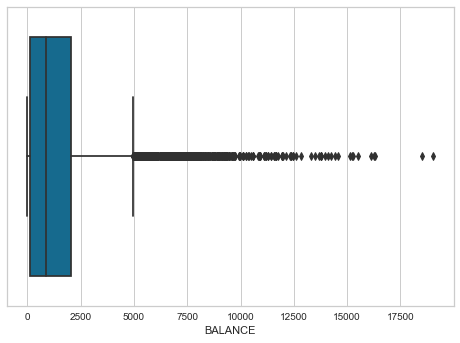

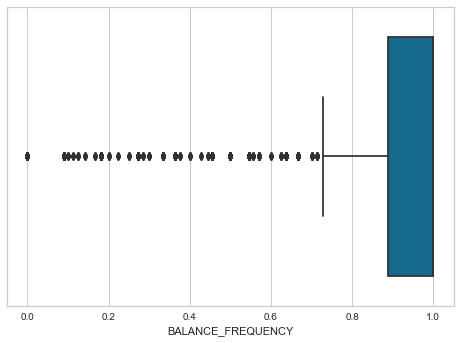

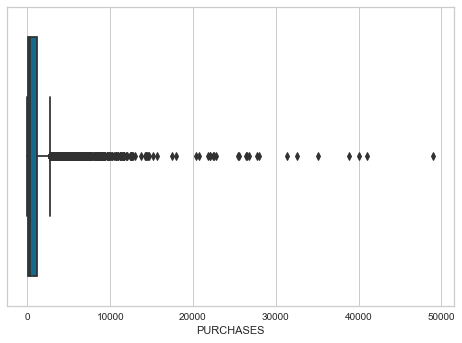

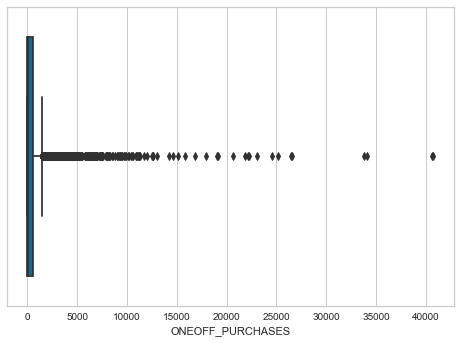

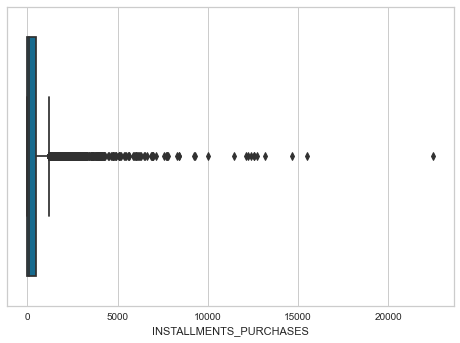

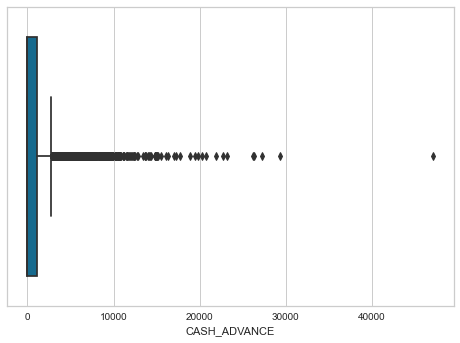

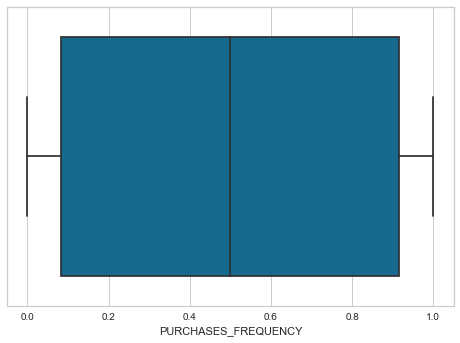

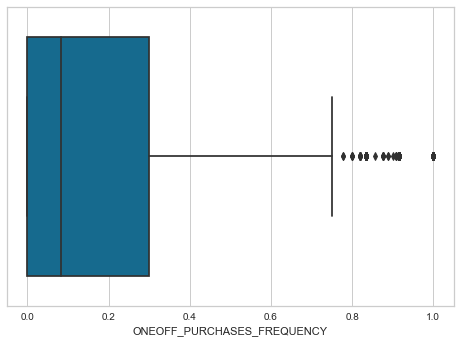

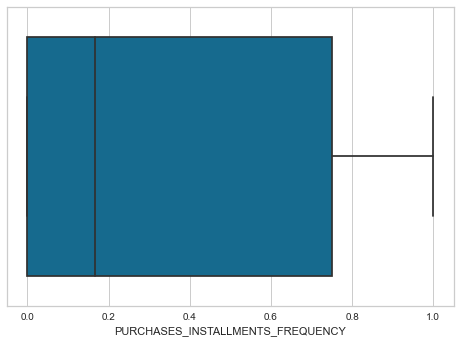

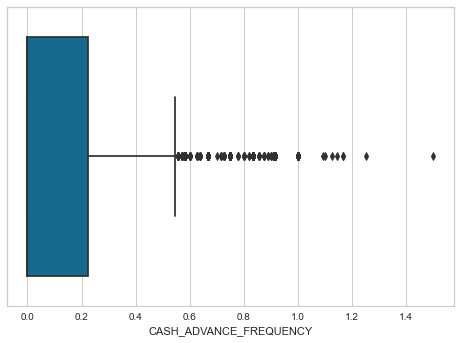

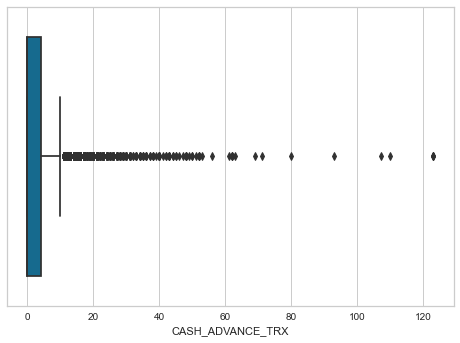

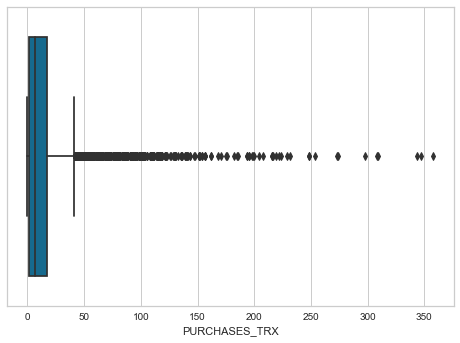

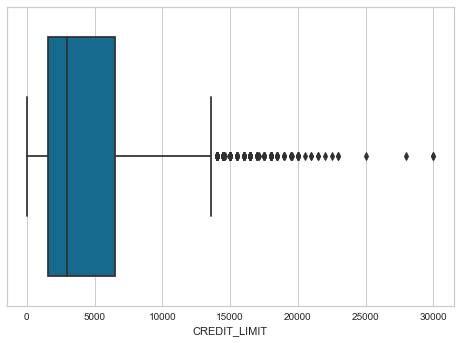

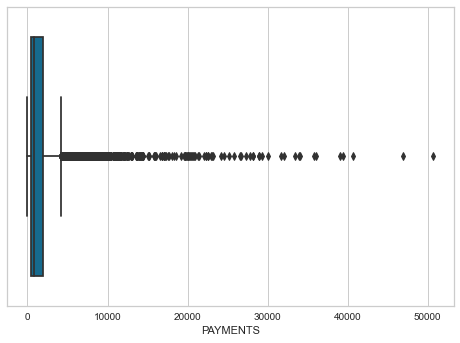

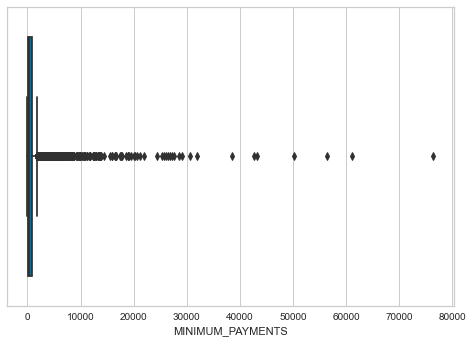

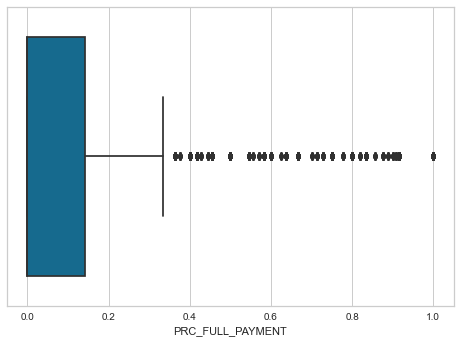

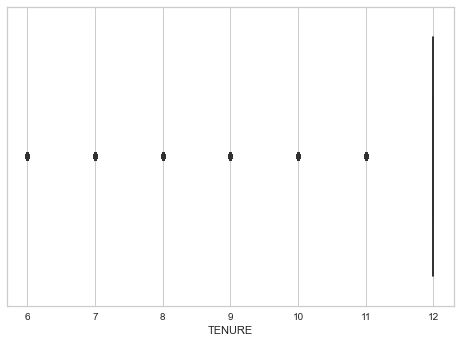

In [11]:
for i in features:
    sns.boxplot(df[i])
    plt.show()

### Data Preprocessing & Explorasi Data

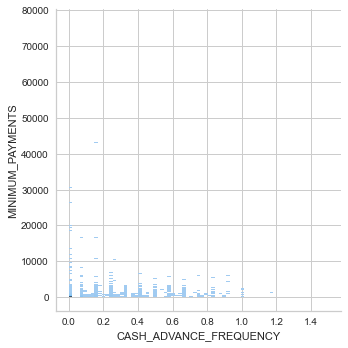

In [12]:
sns.displot(x=df['CASH_ADVANCE_FREQUENCY'], y=df['MINIMUM_PAYMENTS'], data=df)

Semakin jarang customers membayar cash advance (uang dimuka), maka akan semakin tinggi jumlah pembayaran minimumnya.

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

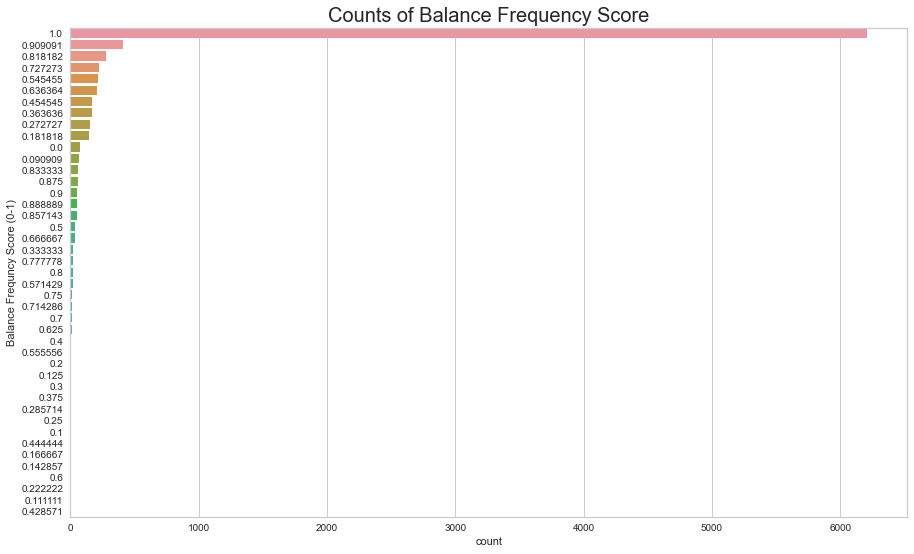

In [13]:
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(y=df['BALANCE_FREQUENCY'],order = df['BALANCE_FREQUENCY'].value_counts().index)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

Dari plot diatas bisa kita lihat bahwa banyak orang yang sering menggunakan kartu kreditnya, daripada orang yang membuat kartunya tidak aktif.

Text(0.5, 0, 'Months')

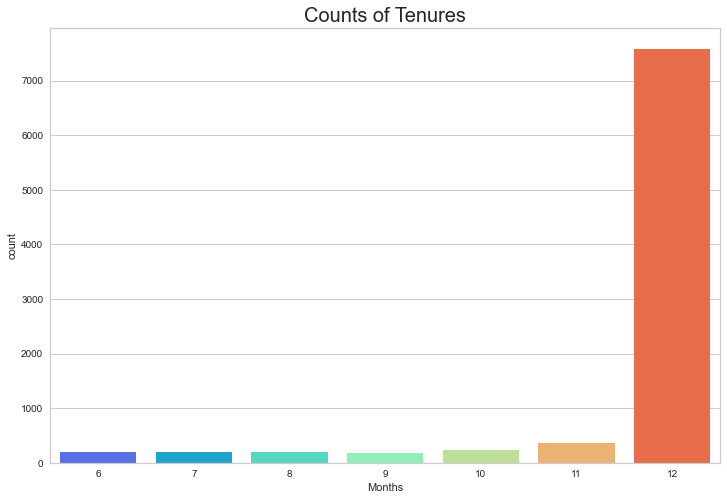

In [14]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['TENURE'], palette='rainbow')
plt.title('Counts of Tenures', fontsize = 20)
plt.xlabel('Months')

Dari plot diatas bisa kita lihat bahwa Tenure kartu di bulan 12, Jika kita lihat semakin lama jabatan, semakin banyak tingkat bunga yang dibayarkan, semakin banyak waktu yang dimiliki untuk membayar kembali kartunya merupakan orang pilihan atau orang yang diinginkan oleh pihak pemberi Kartu Kredit. 

Text(0.5, 0, 'Balance')

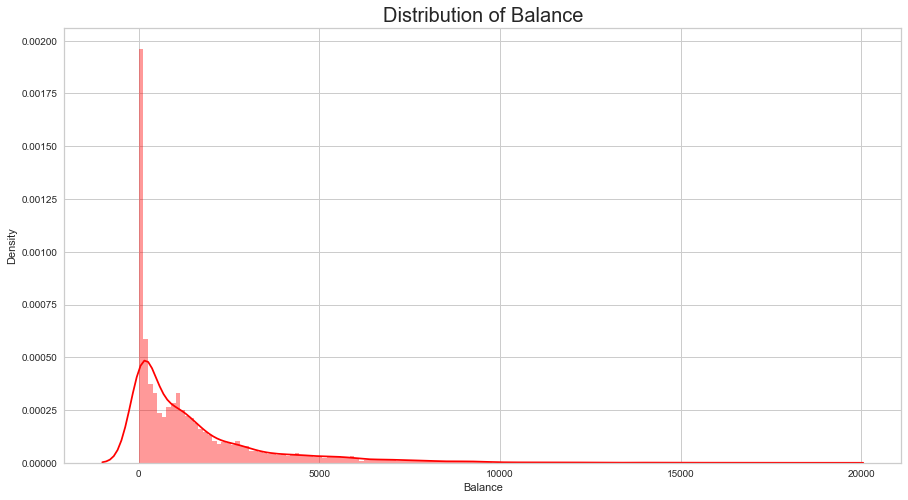

In [15]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(df['BALANCE'],bins=150, color='red')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

Distribusi balance (Jumlah total uang yang akan diutangkan atau yang akan kita utangi ke perusahaan kartu kredit) berkisar dari 0 hingga 20.000 dollar. 

Dari plot diatas terlihat bahwa jumlah kartu kredit dengan saldo 0 sangat banyak.
Mungkin ini terjadi dikarenakan jika seseorang menjaga saldo tetap rendah, tetapi kreditnya tinggi maka ini akan meningkatkan rasio pemanfaatan kredit dan akan meningkatkan nilai kredit.

Text(0.5, 0, 'Purchases')

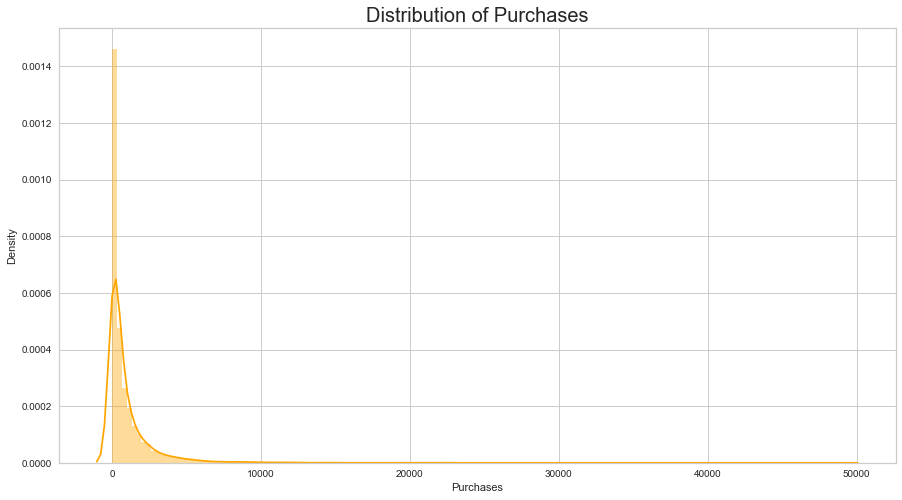

In [16]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(df['PURCHASES'], color='orange', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

Dari plot diatas kita bisa lihat bahwa Distribution of Purchases orang jumlah pembeliannya 0 hal ini sangat masuk akal dikarenakan plot sebelumnya kita lihat bahwa banyak orang memegang kartu kredit dengan saldonya nol.

Text(0.5, 0, 'Amount')

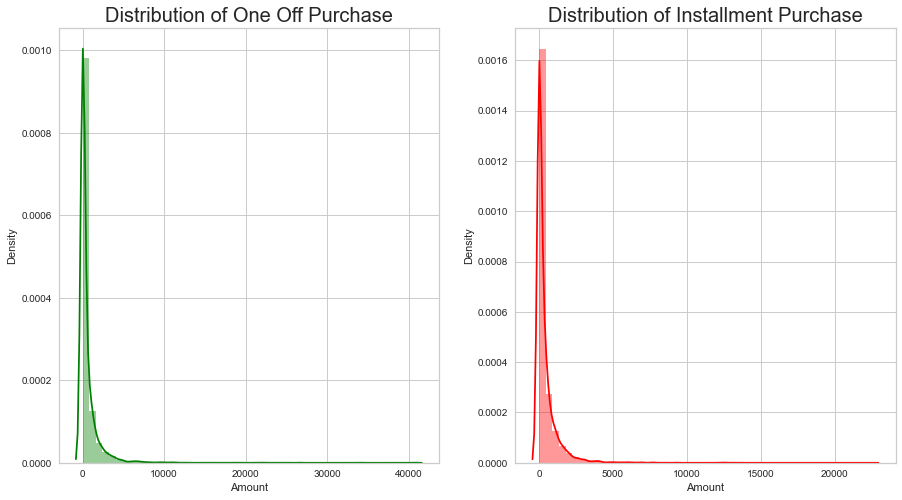

In [17]:
plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('Amount')


plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Amount')

Diatas merupakan plot perbandingan diantara 
- Distribution of one off purhases 
&
- Installment Purchases 

dari plot diatas One off purchases naik hingga lebih dari 40.000 dollar sementara Installment Purchase dengan cicilan tertinggi naik menjadi sekitar 25.000 dollar.

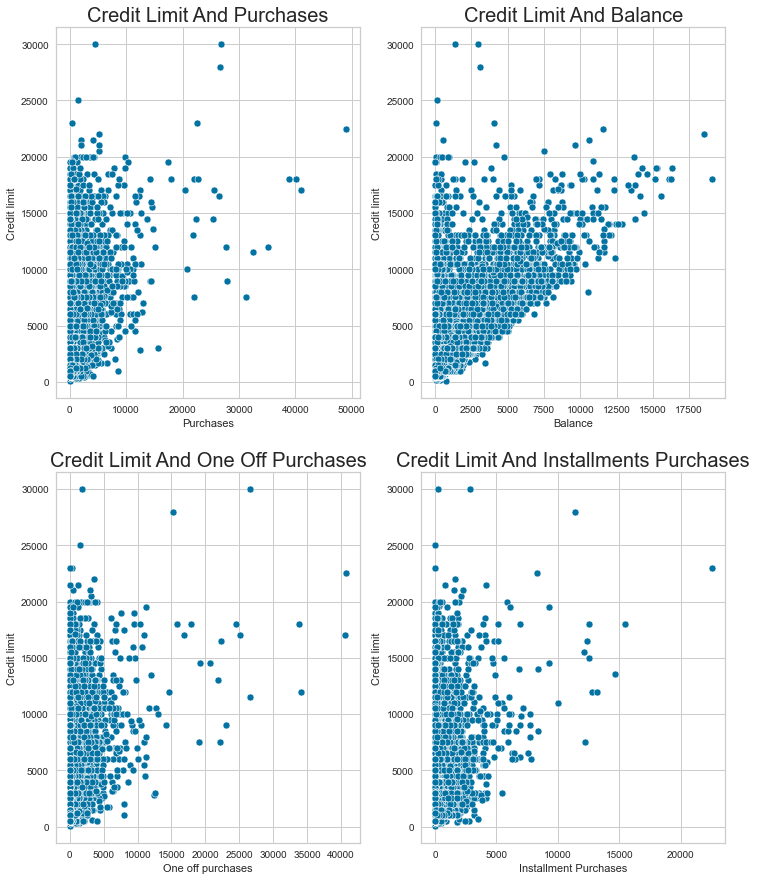

In [18]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Purchases', fontsize =20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And One Off Purchases', fontsize =20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Installments Purchases', fontsize =20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

plt.show()


Diatas merupakan plot Credit Limit VS Balance dan Tipe purchase yang berbeda.

Dimulai dengan tipe Purchases yang berbeda, bisa kita lihat bahwa plot ini berpencar, dari grafik ini tidak ada korelasi yang kuat diantara credit limit dan purchases, jumlah purchases cenderung nol sementara credit limit semakin meningkat.

Ini menunjukkan bahwa customer memang ingin menjaga saldonya agar tetap rendah untuk memanfaatkan kreditnya.


Credit limit nampaknya memiliki korelasi dengan saldo, ketika credit limit naik saldo juga akan naik, tetapi dari plot diatas ada juga saldo tetap nol dan batas credit limit naik. 

Text(0.5, 0, 'Purchases')

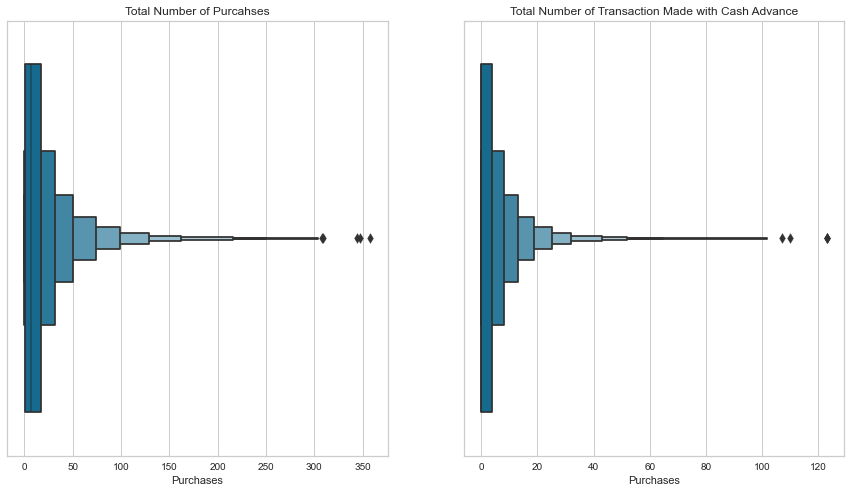

In [19]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(df['PURCHASES_TRX'])
plt.title('Total Number of Purcahses')
plt.xlabel('Purchases')

plt.subplot(1,2,2)
sns.boxenplot(df['CASH_ADVANCE_TRX'])
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('Purchases')


Diatas merupakan plot Total number of Purchases dan Total Number od Transaction Made with Cash Advance

Banyak orang yang memiliki transaksi yang rendah, karena orang menggunakan kartu kredit untuk pemanfaatan kredit dan bukan untuk pembelian. Hanya beberapa orang yang membeli dalam jumlah besar. Beberapa orang membeli lebih dari 300 kali dan lebih sedikit yang melakukan lebih dari 100 kali dengan Cash Advance.

Text(0.5, 1.0, 'Heat Map')

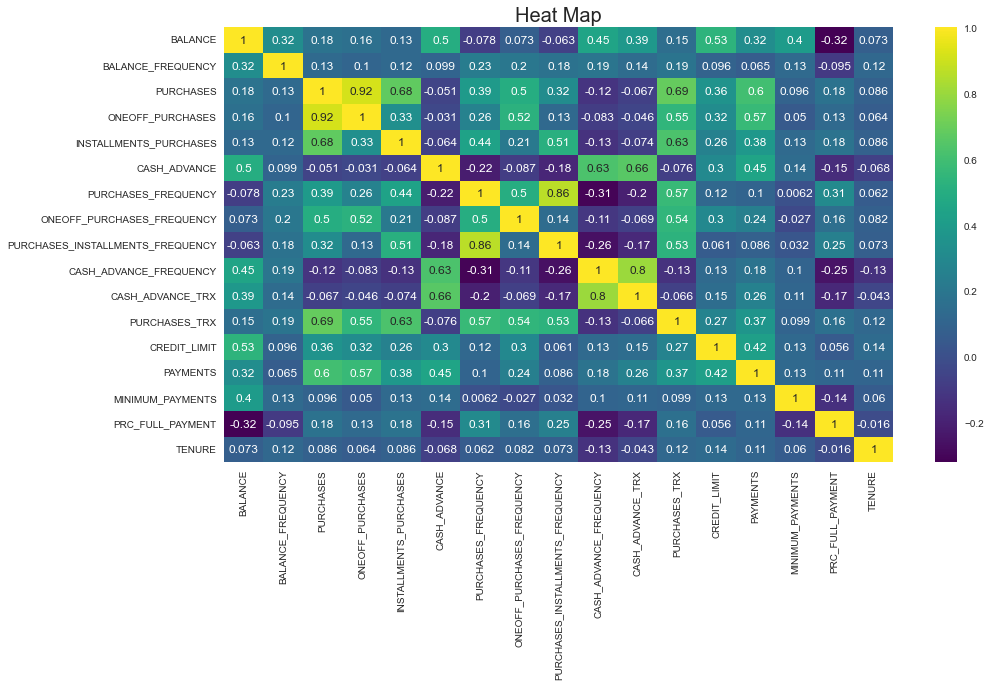

In [20]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize =20)

- Purchases dan one off purchases memiliki korelasi yang sangat tinggi di 0,92
- Cash Advance Trx dan Cash Advance Frequency di 0.8


##### Robust Scaler
Clustering, Klasifikasi dan Regresi akan bekerja dengan baik bila data yang digunakan berada dalam unit of measurement.

Disini kita akan menggunakan scaler, sebagian besar fitur dari data ini berisi outlier yang sangat banyak, scaler yang kuat menggunakan median dan IQR yang merupakan estimasi tendensi sentral yang lebih baik dengan adanya outlier.

In [21]:
X = df[features]
X_scaled = pd.DataFrame(RobustScaler().fit_transform(X), columns=X.columns, index=X.index)
df_scaled = pd.concat([df['CUST_ID'], X_scaled], axis=1)

In [22]:
df_scaled[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

Summary Statistics
(Mean, Median, Min dan Max)

In [23]:
(df_scaled[features].describe().transpose()
     [['mean', '50%', 'min', 'max']]
     .rename(columns={'50%': 'median'})
     .style.background_gradient(cmap = 'RdYlGn'))

,mean,median,min,max
BALANCE,0.358848,0.000000,-0.453504,9.434627
BALANCE_FREQUENCY,-1.104565,0.000000,-9.000009,0.000000
PURCHASES,0.599652,0.000000,-0.337489,45.472693
ONEOFF_PURCHASES,0.960223,0.000000,-0.065812,70.528052
INSTALLMENTS_PURCHASES,0.687243,0.000000,-0.189912,47.821611
CASH_ADVANCE,0.878840,0.000000,0.000000,42.320270
PURCHASES_FREQUENCY,-0.011579,0.000000,-0.600000,0.600000
ONEOFF_PURCHASES_FREQUENCY,0.397082,0.000000,-0.277777,3.055557
PURCHASES_INSTALLMENTS_FREQUENCY,0.263694,0.000000,-0.222223,1.111111
CASH_ADVANCE_FREQUENCY,0.608150,0.000000,0.000000,6.750007


##### Bootstraping 
Merupakan teknik yang digunakan untuk memperkirakan rata-rata populasi suatu variabel. 

In [24]:
samples = 1000
est_popu_means = {}
boot = []
for a in features:
    for b in range(samples):
        c = df[a].sample(frac = 0.33, random_state = 1).mean()
        boot.append(c)
    p_mean = sum(boot)/len(boot)
    est_popu_means[a] = p_mean
    boot.clear()



In [25]:
# Mean of each feature in the dataset
sampling_mean = []
for i in features:
    x = df[i].mean()
    sampling_mean.append(x)

df_means = pd.DataFrame({'Feature': list(est_popu_means.keys())
                       , 'Bootstrap_Mean': list(est_popu_means.values())
                       , 'Mean_in_dataset': sampling_mean})

df_means

,Feature,Bootstrap_Mean,Mean_in_dataset
0,BALANCE,1544.925802,1564.474828
1,BALANCE_FREQUENCY,0.880153,0.877271
2,PURCHASES,1029.234242,1003.204834
3,ONEOFF_PURCHASES,614.426114,592.437371
4,INSTALLMENTS_PURCHASES,414.974506,411.067645
5,CASH_ADVANCE,939.023397,978.871112
6,PURCHASES_FREQUENCY,0.496370,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,0.198057,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.370166,0.364437
9,CASH_ADVANCE_FREQUENCY,0.132016,0.135144


##### Distributions 
Menggunakan histogram untuk memvisualisasikan distribusi setiap fitur, garis vertikal menunjukkan perkiraan rata-rata populasi dari boosttrap sampling.


BALANCE
Bootstrap mean: 1544.9258020701038


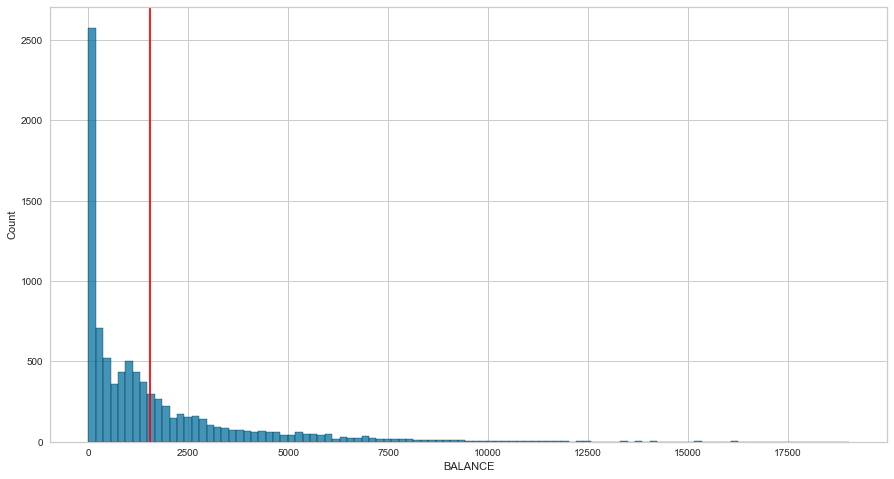

BALANCE_FREQUENCY
Bootstrap mean: 0.8801531983750754


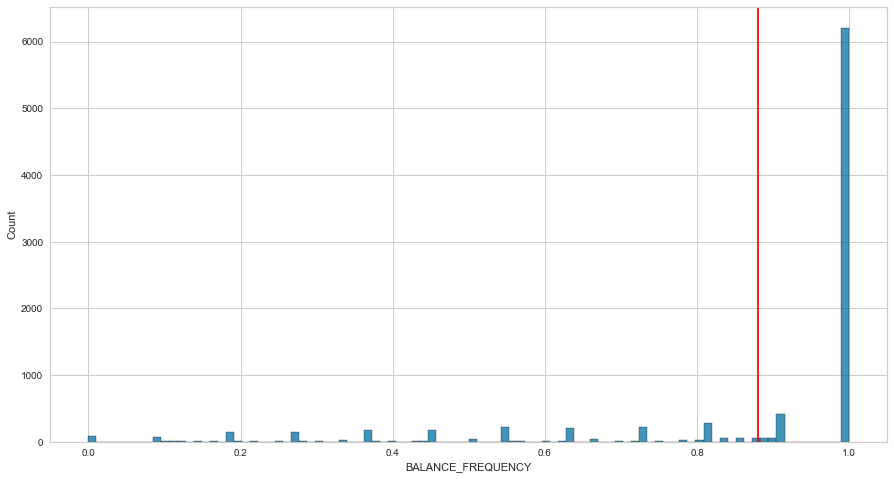

PURCHASES
Bootstrap mean: 1029.2342417061789


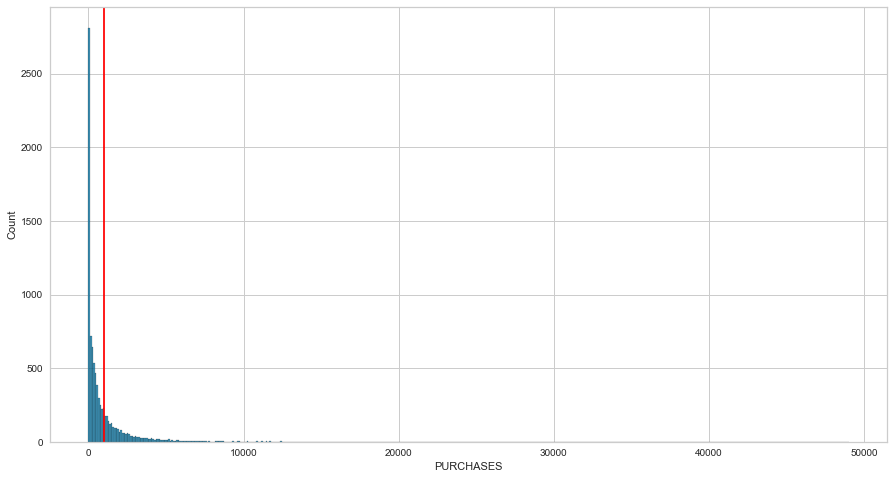

ONEOFF_PURCHASES
Bootstrap mean: 614.4261137440737


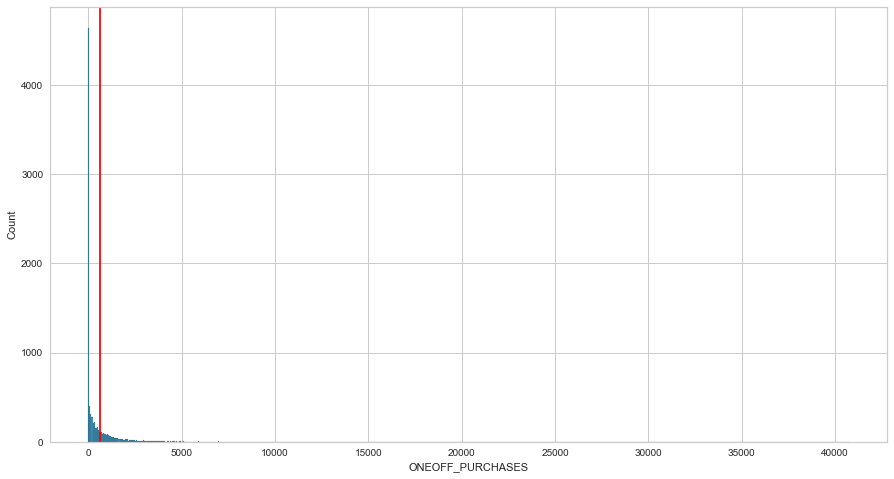

INSTALLMENTS_PURCHASES
Bootstrap mean: 414.9745057549034


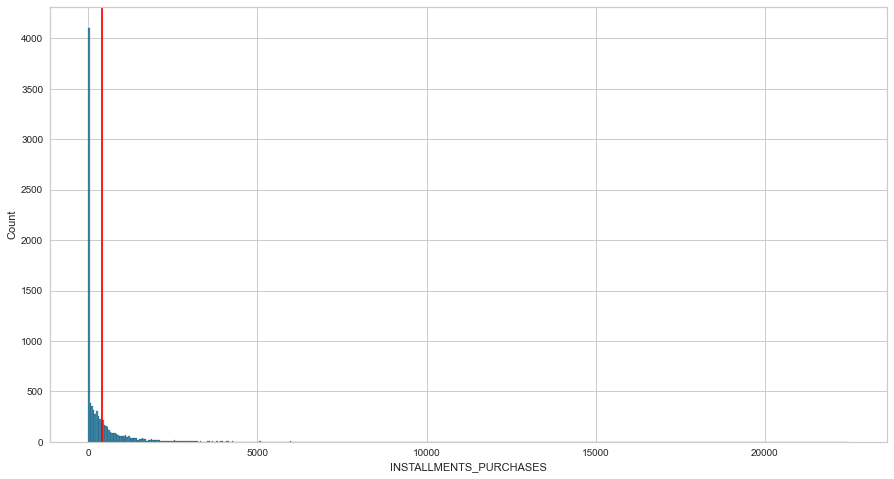

CASH_ADVANCE
Bootstrap mean: 939.0233965822512


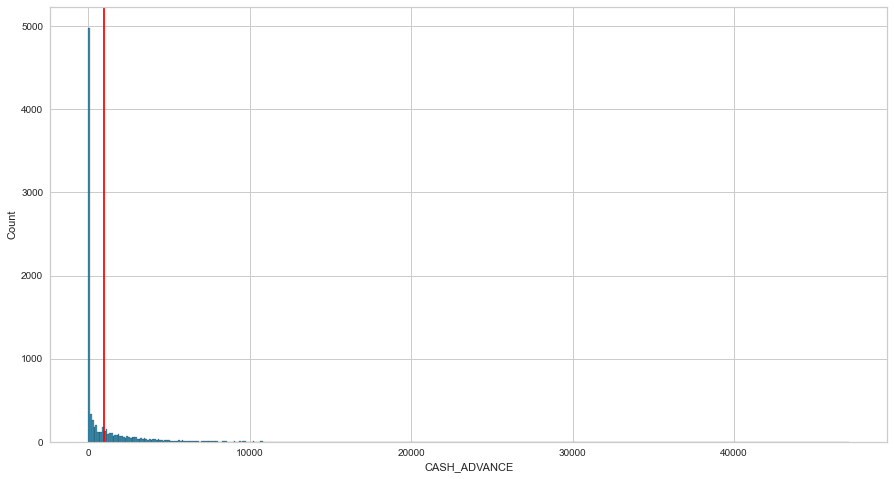

PURCHASES_FREQUENCY
Bootstrap mean: 0.49637017907922376


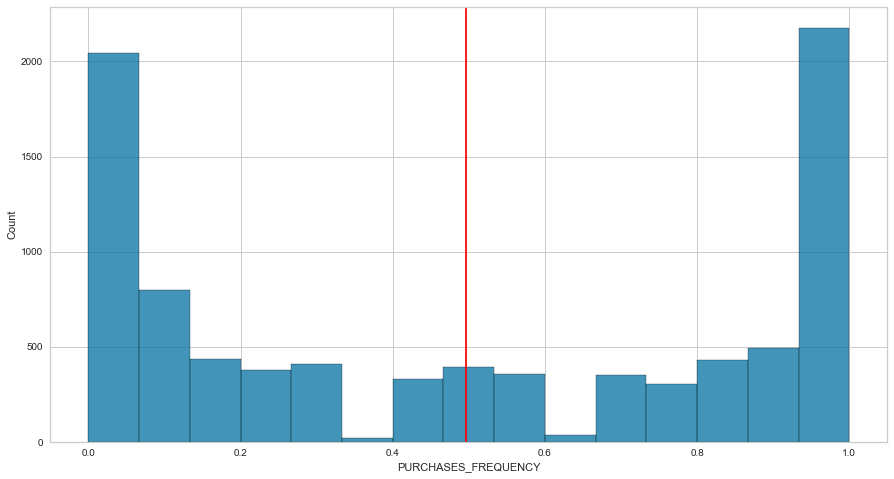

ONEOFF_PURCHASES_FREQUENCY
Bootstrap mean: 0.19805704468517663


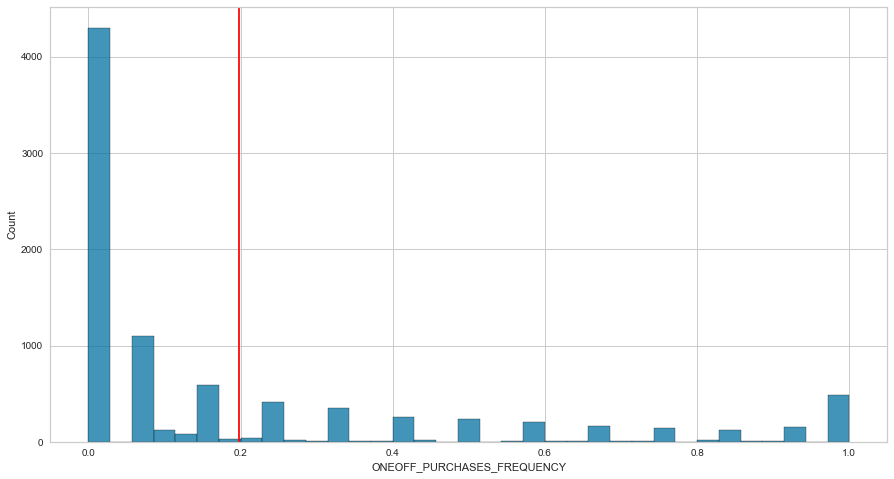

PURCHASES_INSTALLMENTS_FREQUENCY
Bootstrap mean: 0.37016616418416426


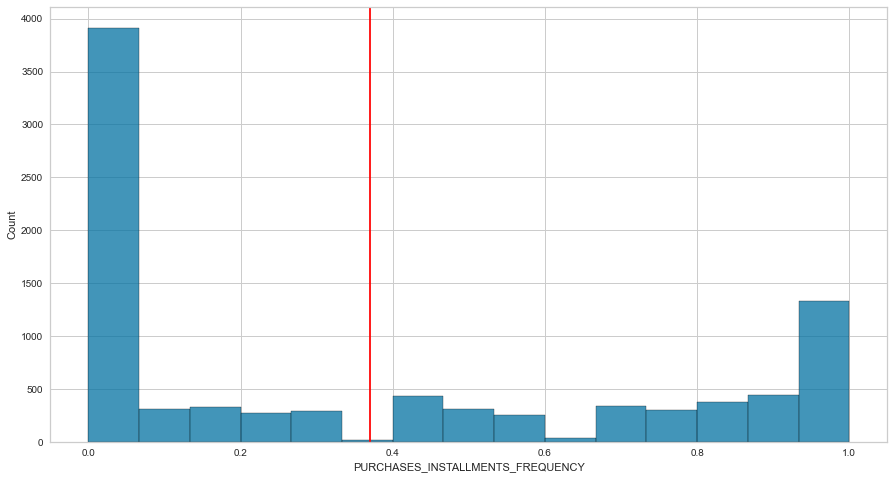

CASH_ADVANCE_FREQUENCY
Bootstrap mean: 0.13201607278266547


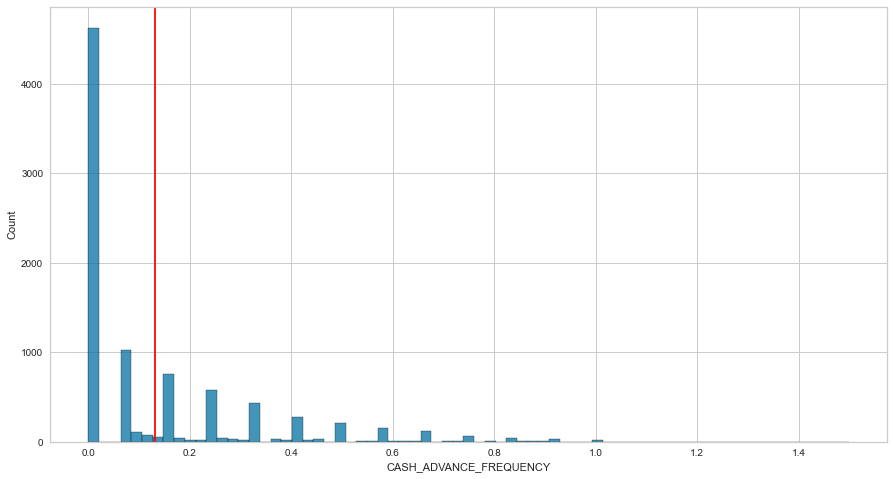

CASH_ADVANCE_TRX
Bootstrap mean: 3.113067027758926


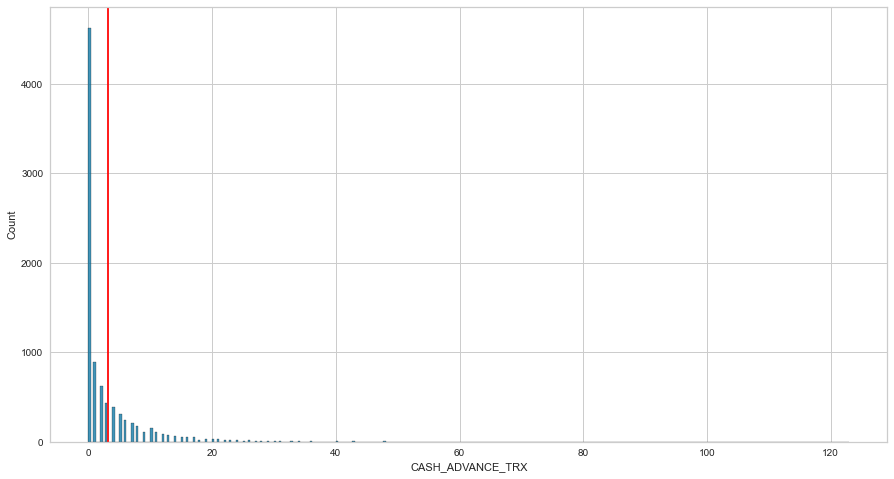

PURCHASES_TRX
Bootstrap mean: 14.807718348002306


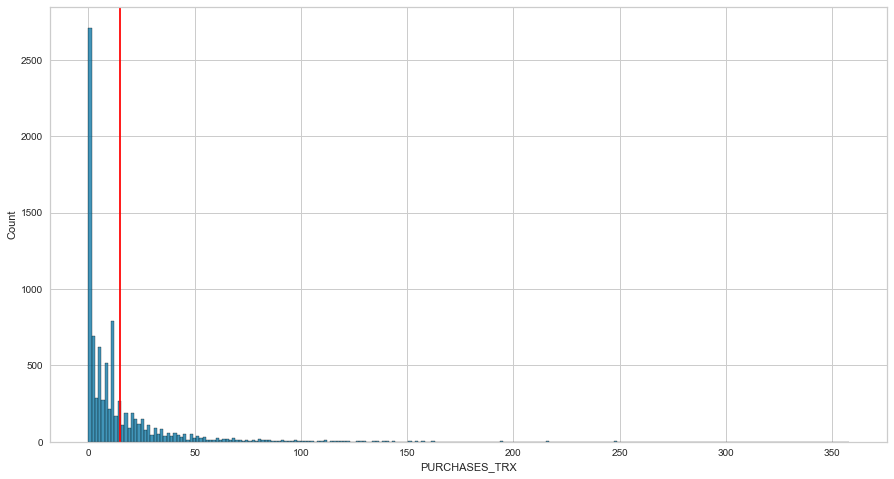

CREDIT_LIMIT
Bootstrap mean: 4538.437523508847


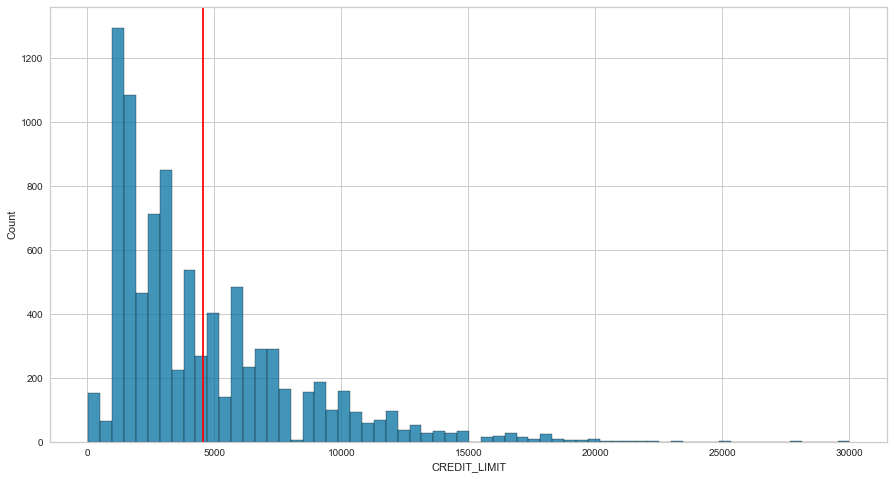

PAYMENTS
Bootstrap mean: 1742.0113839796504


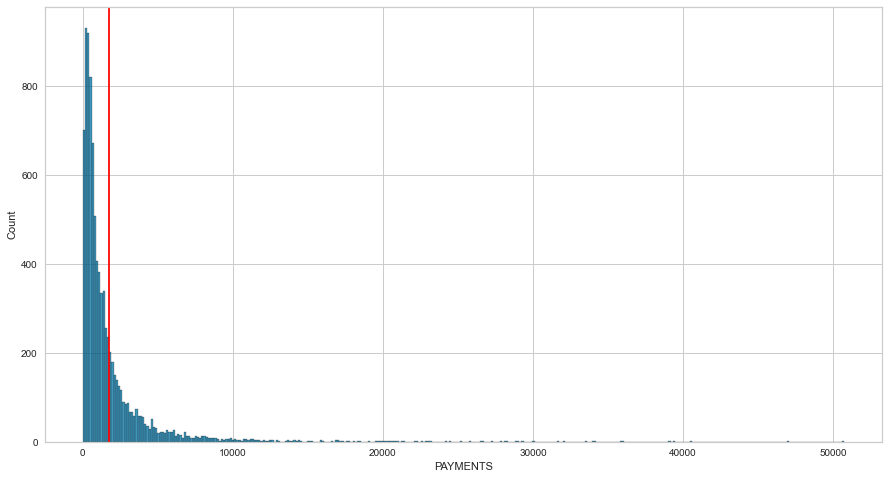

MINIMUM_PAYMENTS
Bootstrap mean: 887.718778012875


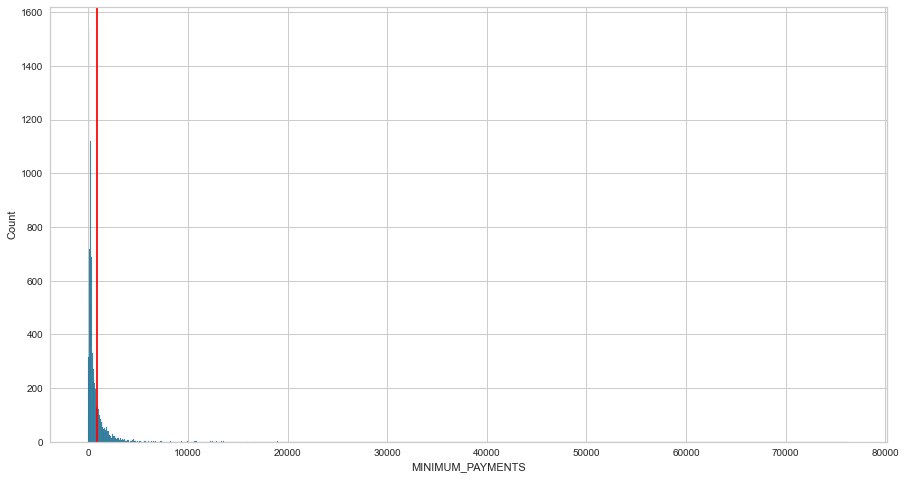

PRC_FULL_PAYMENT
Bootstrap mean: 0.16276787542315654


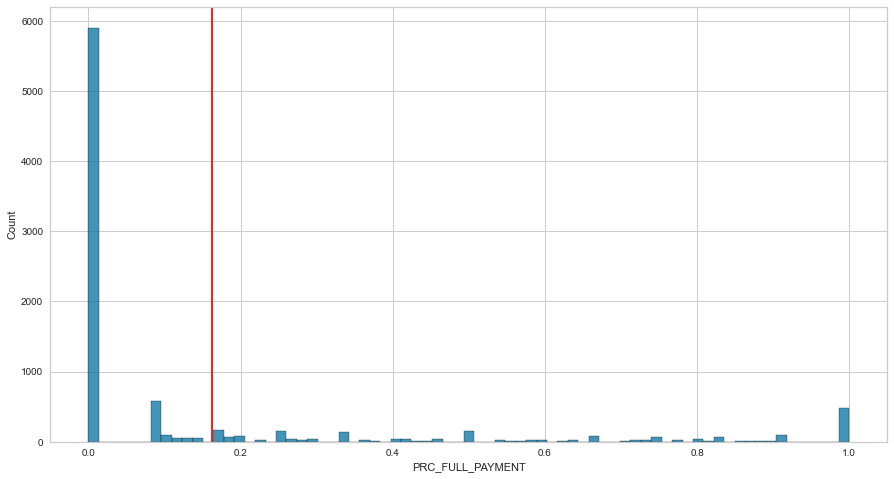

TENURE
Bootstrap mean: 11.515910629654666


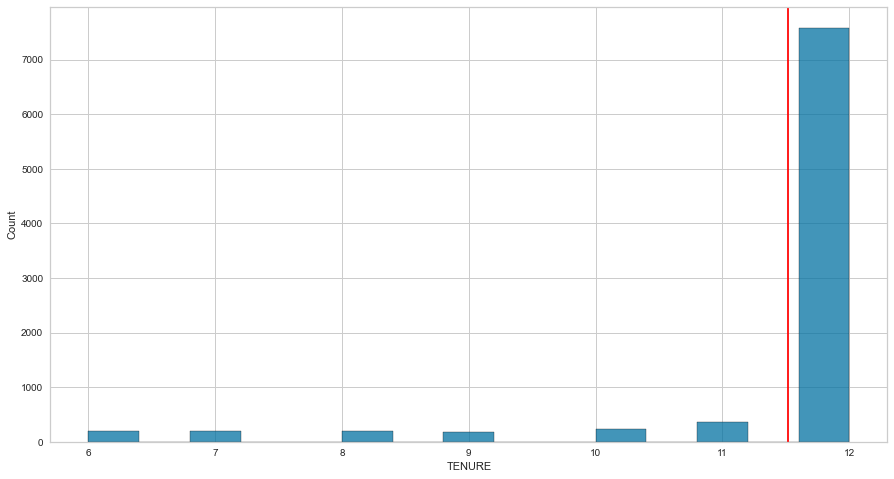

In [26]:
for i in features:
    boot_mean = df_means.loc[df_means['Feature'] == i, 'Bootstrap_Mean'].iloc[0]
    print(i)
    print('Bootstrap mean:', boot_mean)
    sns.histplot(df[i])
    plt.axvline(boot_mean, color = 'red')
    plt.show()

##### Spearman Correlation 

Dikarenakan fitur tidak terdistribusi dengan normal, maka akan menggunakan korelasi spearman. Korelasi Spearman menggunakan peringkat untuk mengukur hubungan antar variabel, dan tidak memerlukan data terdistribusi normal.

In [27]:
spearman_corr = round(df_scaled[features].corr(method = 'spearman'), 2)
spearman_corr.style.background_gradient(cmap = 'RdYlGn')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.540000,0.010000,0.150000,-0.090000,0.570000,-0.150000,0.120000,-0.140000,0.540000,0.550000,-0.050000,0.370000,0.430000,0.870000,-0.480000,0.070000
BALANCE_FREQUENCY,0.540000,1.000000,0.150000,0.130000,0.130000,0.140000,0.200000,0.160000,0.150000,0.180000,0.180000,0.200000,0.110000,0.210000,0.470000,-0.170000,0.230000
PURCHASES,0.010000,0.150000,1.000000,0.750000,0.710000,-0.380000,0.790000,0.690000,0.610000,-0.390000,-0.380000,0.890000,0.260000,0.390000,-0.010000,0.240000,0.130000
ONEOFF_PURCHASES,0.150000,0.130000,0.750000,1.000000,0.200000,-0.180000,0.420000,0.950000,0.120000,-0.180000,-0.180000,0.590000,0.300000,0.360000,0.070000,0.050000,0.100000
INSTALLMENTS_PURCHASES,-0.090000,0.130000,0.710000,0.200000,1.000000,-0.360000,0.790000,0.190000,0.920000,-0.370000,-0.360000,0.780000,0.120000,0.240000,-0.060000,0.280000,0.120000
CASH_ADVANCE,0.570000,0.140000,-0.380000,-0.180000,-0.360000,1.000000,-0.450000,-0.190000,-0.380000,0.940000,0.950000,-0.410000,0.160000,0.260000,0.480000,-0.270000,-0.110000
PURCHASES_FREQUENCY,-0.150000,0.200000,0.790000,0.420000,0.790000,-0.450000,1.000000,0.460000,0.850000,-0.450000,-0.450000,0.920000,0.100000,0.170000,-0.110000,0.290000,0.100000
ONEOFF_PURCHASES_FREQUENCY,0.120000,0.160000,0.690000,0.950000,0.190000,-0.190000,0.460000,1.000000,0.110000,-0.180000,-0.170000,0.610000,0.280000,0.320000,0.050000,0.060000,0.080000
PURCHASES_INSTALLMENTS_FREQUENCY,-0.140000,0.150000,0.610000,0.120000,0.920000,-0.380000,0.850000,0.110000,1.000000,-0.380000,-0.370000,0.780000,0.050000,0.120000,-0.090000,0.260000,0.110000
CASH_ADVANCE_FREQUENCY,0.540000,0.180000,-0.390000,-0.180000,-0.370000,0.940000,-0.450000,-0.180000,-0.380000,1.000000,0.980000,-0.410000,0.090000,0.200000,0.450000,-0.290000,-0.130000


##### Multiple Linear Regression
Menggunakan model Linear Regression untuk setiao fitur menggunakan fitur sebagai predator. Plot score R2 untuk setiap model gun amemplejari fitur mana yang memiliki hubungan kuat dan lemah dengan fitur lainnya.

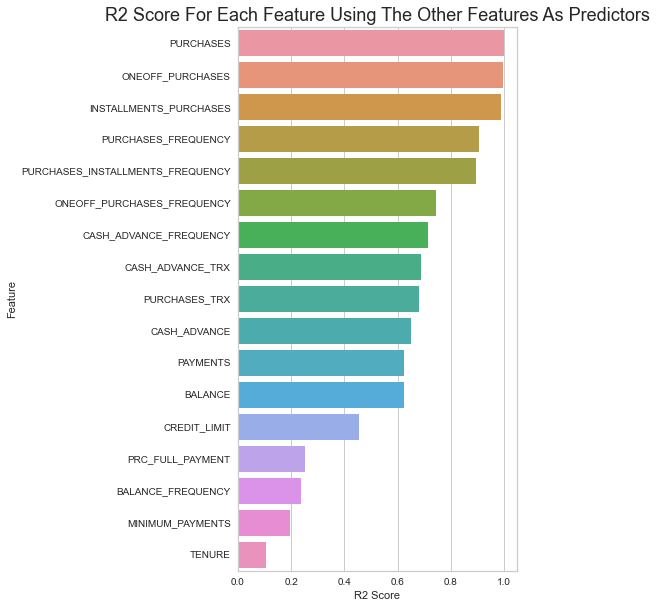

In [28]:
response_variable = []
r2score = []
residuals = pd.DataFrame()

for i in features:
    X = df_scaled[features]
    X = X.drop(i, axis=1)
    y = df_scaled[i]
    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)
    
    residuals[i] = y - y_pred
    
    response_variable.append(i)
    r2score.append(score)

regression_results = pd.DataFrame({'Response_variable': response_variable
                                   , 'R2_Score': r2score})

regression_results.sort_values('R2_Score', ascending=False, inplace=True)
plt.figure(figsize=(5, 10))
sns.barplot(y = 'Response_variable',
            x = 'R2_Score',
            orient = 'h',
            data=regression_results)
plt.title('R2 Score For Each Feature Using The Other Features As Predictors', fontsize=18)
plt.xlabel('R2 Score')
plt.ylabel('Feature')
plt.show()

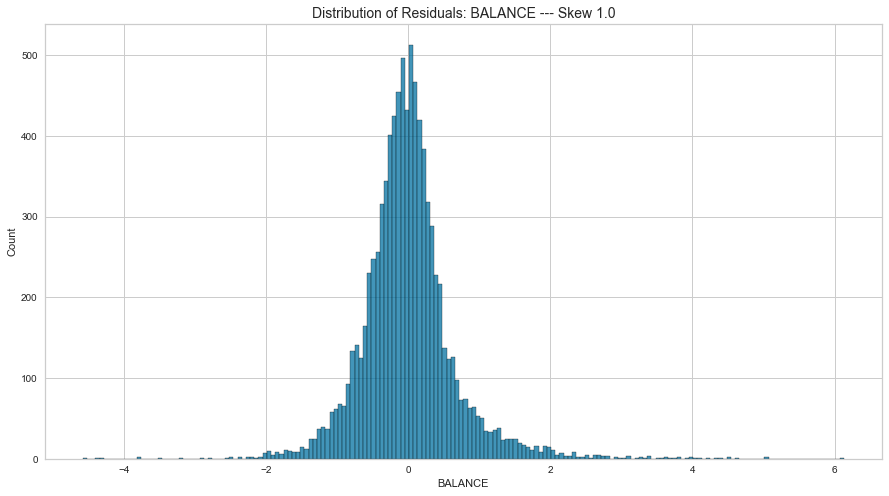

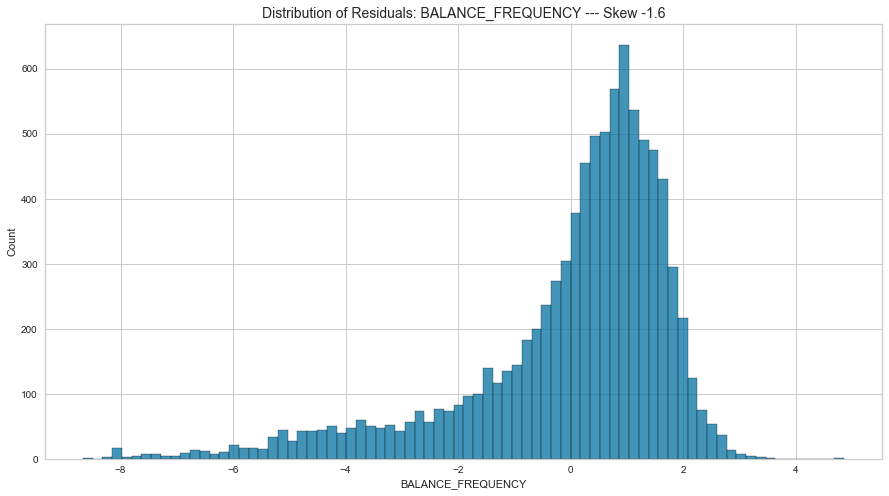

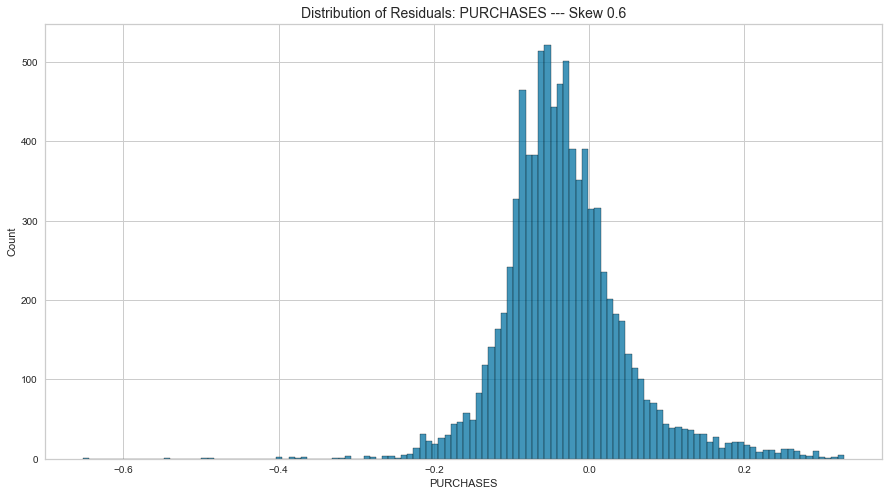

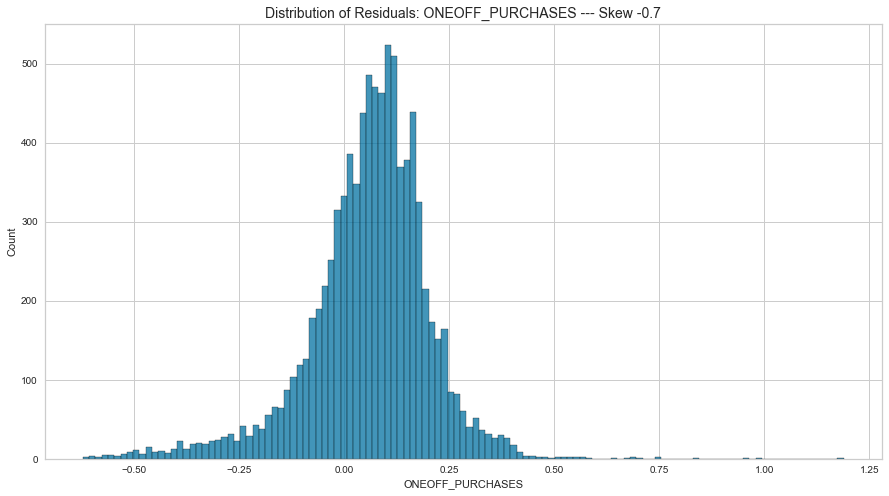

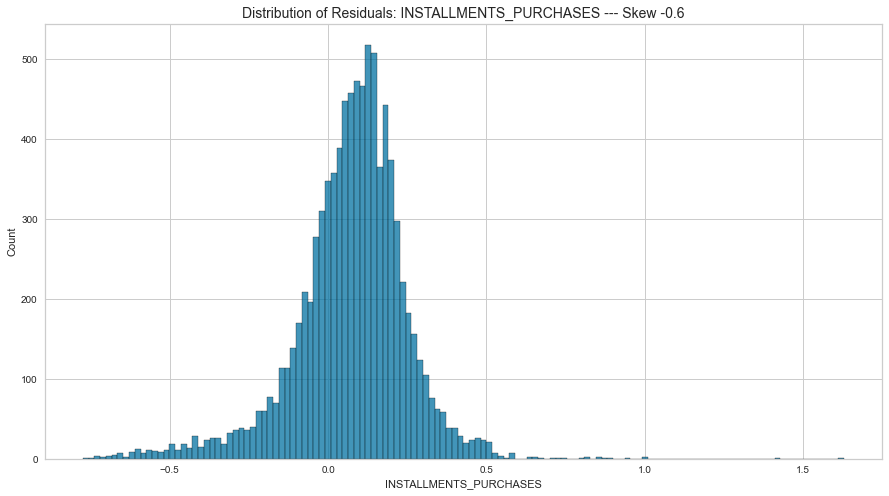

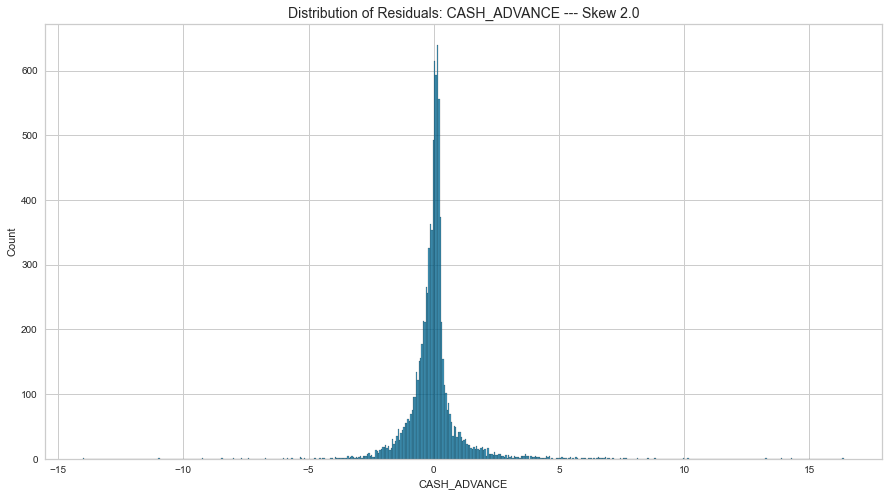

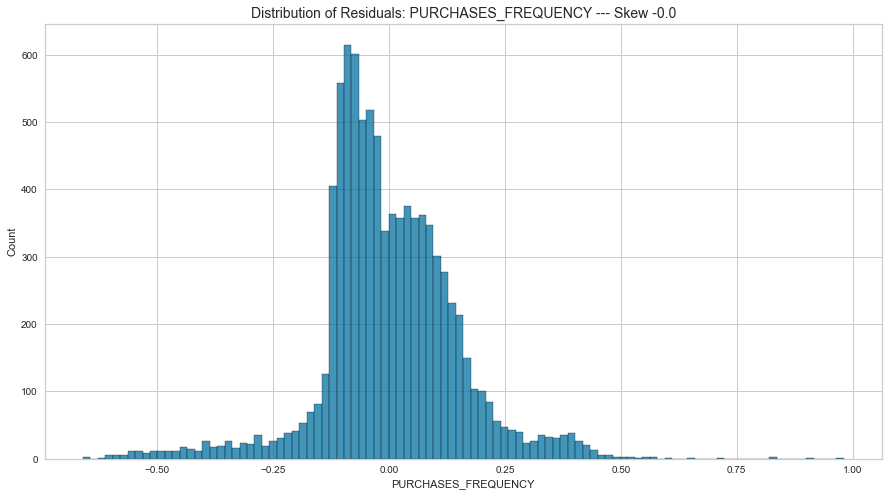

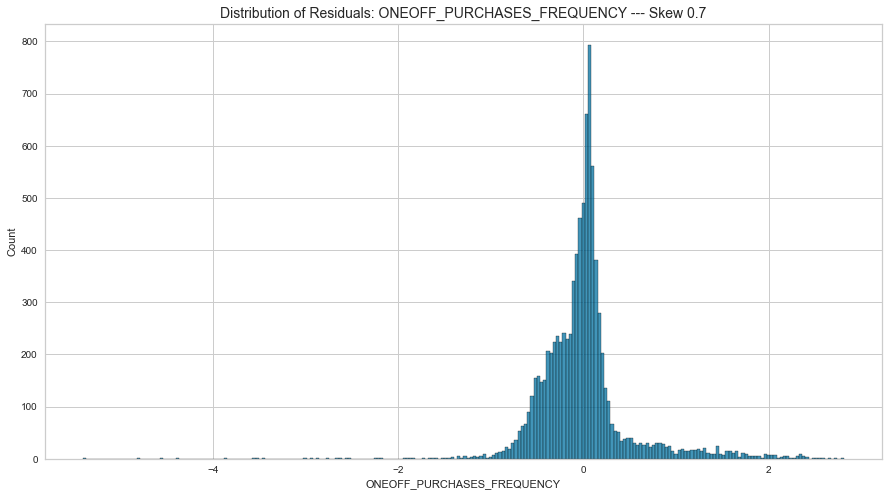

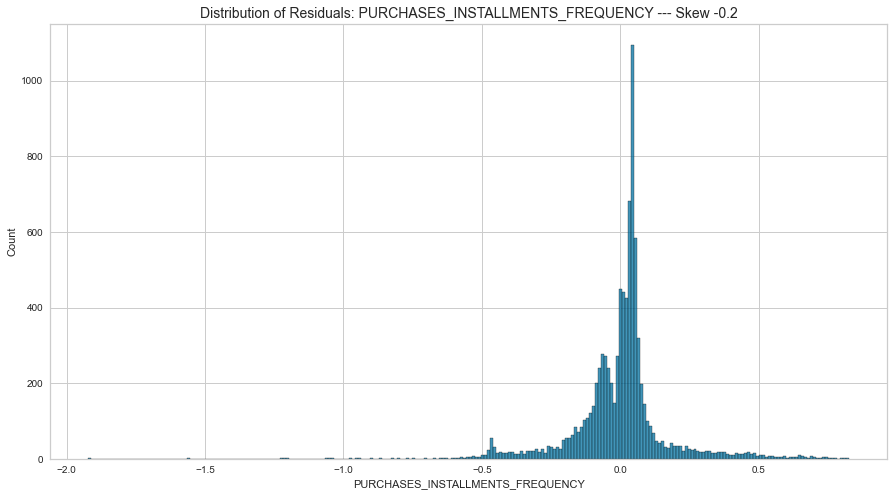

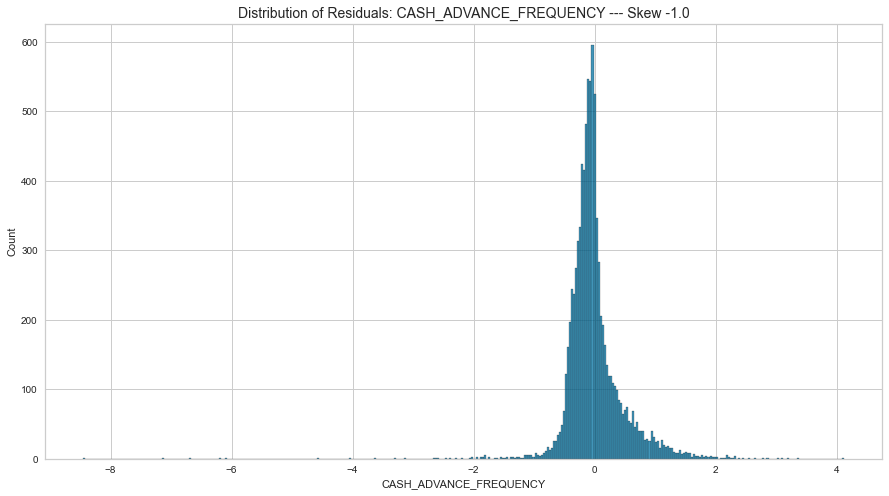

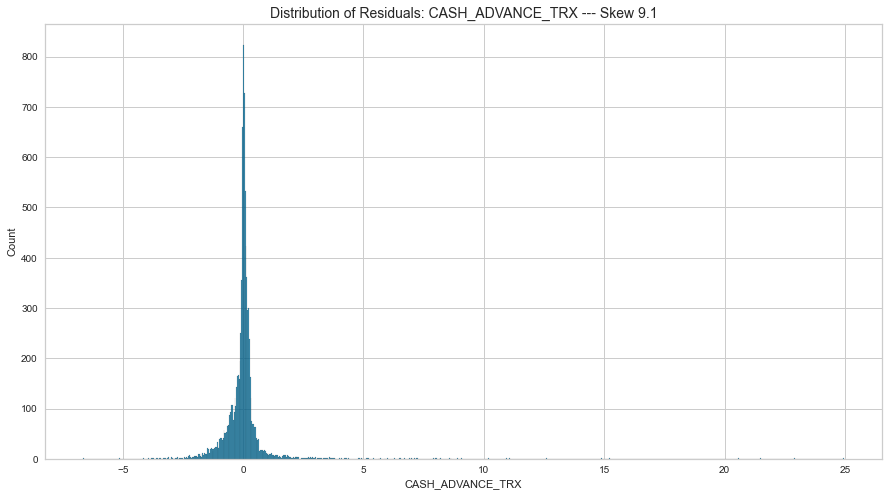

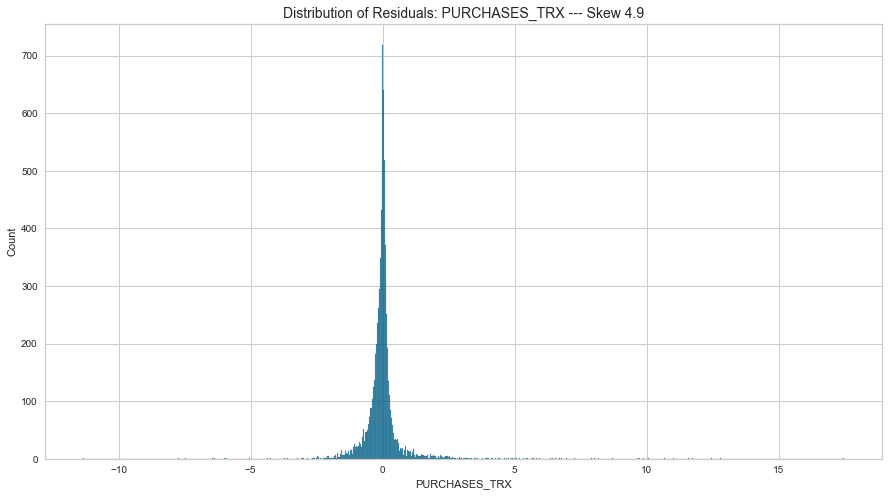

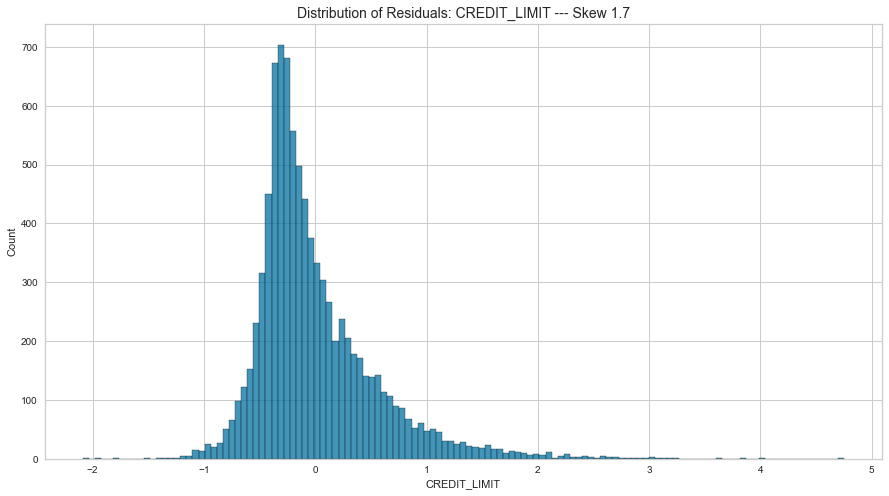

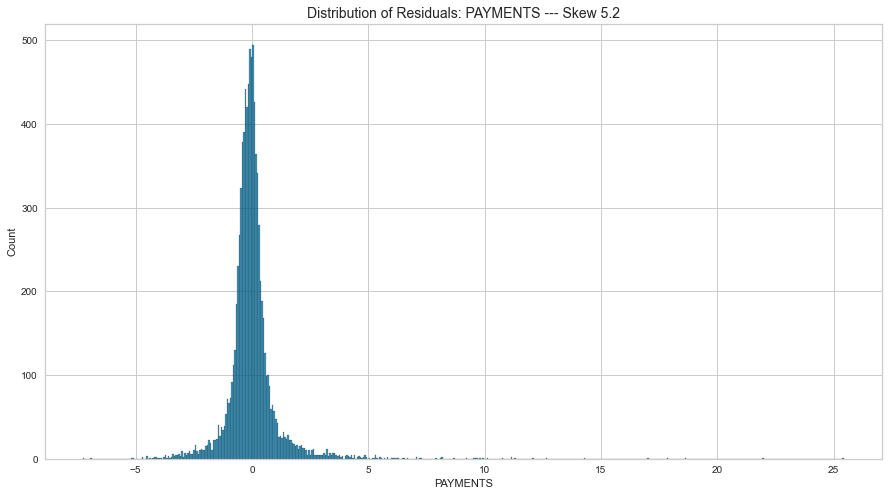

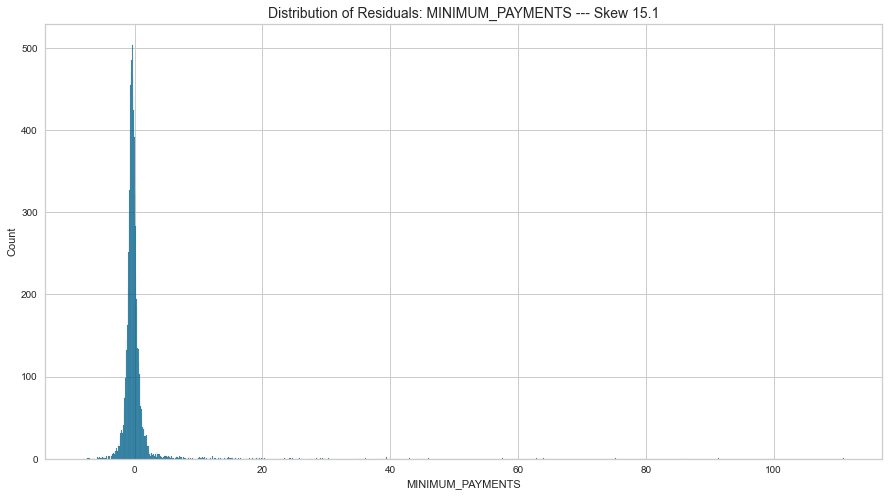

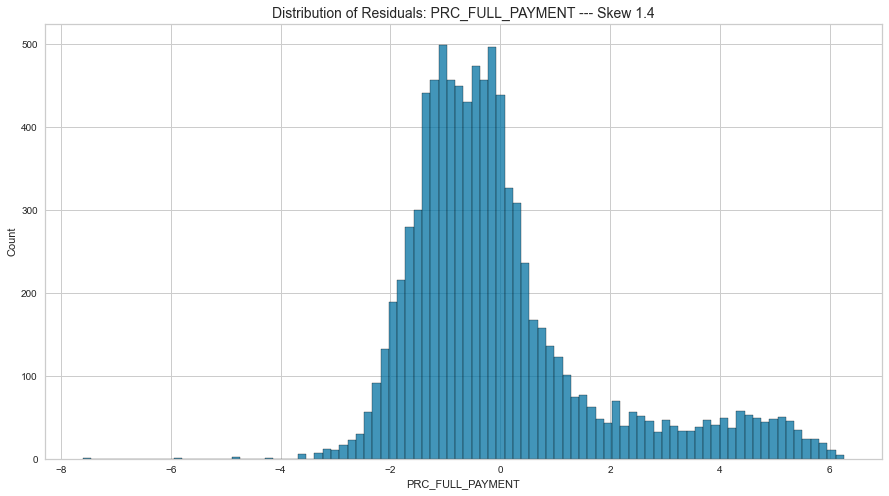

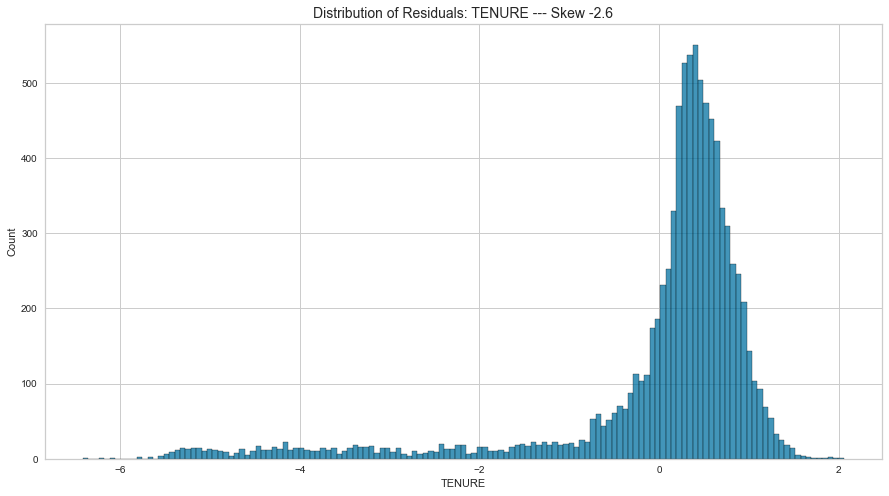

In [29]:
# Plot the distribution of the residuals
# (Multiple linear regression assumes that the residuals are normally distributed)
for i in residuals.columns:
    skew = round(residuals[i].skew(), 1)
    sns.histplot(residuals[i])
    plt.title('Distribution of Residuals: ' + str(i) + ' --- Skew ' + str(skew), fontsize=14)
    plt.show()

In [43]:
def encode_data(features):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(df[features].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [45]:
df['PURCHASES_FREQUENCY'].replace(encode_data('PURCHASES_FREQUENCY'),inplace = True)

{0.166667: 0, 0.0: 1, 1.0: 2, 0.083333: 3, 0.666667: 4, 0.333333: 5, 0.25: 6, 0.75: 7, 0.5: 8, 0.416667: 9, 0.916667: 10, 0.583333: 11, 0.375: 12, 0.625: 13, 0.272727: 14, 0.833333: 15, 0.909091: 16, 0.111111: 17, 0.142857: 18, 0.090909: 19, 0.363636: 20, 0.1: 21, 0.875: 22, 0.125: 23, 0.818182: 24, 0.636364: 25, 0.2: 26, 0.8: 27, 0.3: 28, 0.9: 29, 0.285714: 30, 0.727273: 31, 0.181818: 32, 0.7: 33, 0.545455: 34, 0.888889: 35, 0.714286: 36, 0.454545: 37, 0.857143: 38, 0.555556: 39, 0.428571: 40, 0.4: 41, 0.571429: 42, 0.6: 43, 0.222222: 44, 0.777778: 45, 0.444444: 46}


In [46]:
df['PURCHASES_INSTALLMENTS_FREQUENCY'].replace(encode_data('PURCHASES_INSTALLMENTS_FREQUENCY'),inplace = True)

{0.083333: 0, 0.0: 1, 0.583333: 2, 1.0: 3, 0.25: 4, 0.916667: 5, 0.75: 6, 0.5: 7, 0.333333: 8, 0.666667: 9, 0.416667: 10, 0.166667: 11, 0.833333: 12, 0.4: 13, 0.181818: 14, 0.818182: 15, 0.272727: 16, 0.375: 17, 0.125: 18, 0.636364: 19, 0.545455: 20, 0.909091: 21, 0.888889: 22, 0.2: 23, 0.8: 24, 0.1: 25, 0.142857: 26, 0.857143: 27, 0.444444: 28, 0.454545: 29, 0.111111: 30, 0.6: 31, 0.555556: 32, 0.777778: 33, 0.3: 34, 0.9: 35, 0.363636: 36, 0.714286: 37, 0.875: 38, 0.222222: 39, 0.285714: 40, 0.7: 41, 0.727273: 42, 0.571429: 43, 0.090909: 44, 0.428571: 45, 0.625: 46}


In [47]:
df['ONEOFF_PURCHASES_FREQUENCY'].replace(encode_data('ONEOFF_PURCHASES_FREQUENCY'),inplace = True)

{0.0: 0, 1.0: 1, 0.083333: 2, 0.166667: 3, 0.25: 4, 0.916667: 5, 0.5: 6, 0.416667: 7, 0.333333: 8, 0.666667: 9, 0.375: 10, 0.583333: 11, 0.1: 12, 0.090909: 13, 0.833333: 14, 0.75: 15, 0.111111: 16, 0.142857: 17, 0.125: 18, 0.875: 19, 0.363636: 20, 0.2: 21, 0.818182: 22, 0.8: 23, 0.3: 24, 0.636364: 25, 0.181818: 26, 0.909091: 27, 0.285714: 28, 0.222222: 29, 0.727273: 30, 0.571429: 31, 0.6: 32, 0.272727: 33, 0.714286: 34, 0.545455: 35, 0.428571: 36, 0.444444: 37, 0.454545: 38, 0.625: 39, 0.777778: 40, 0.555556: 41, 0.7: 42, 0.9: 43, 0.4: 44, 0.857143: 45, 0.888889: 46}


### Modelling

Menemukan cluster yang optimal dengan menggunakan metode elbow. Menggunakan library KElbowVisualizer lalu akan di plot jumlah cluster, mengidetifikasi jumlah cluster yang optimal menggunakan titik pada grafik yang terlihat seperti siku.

Optimal number of clusters: 6


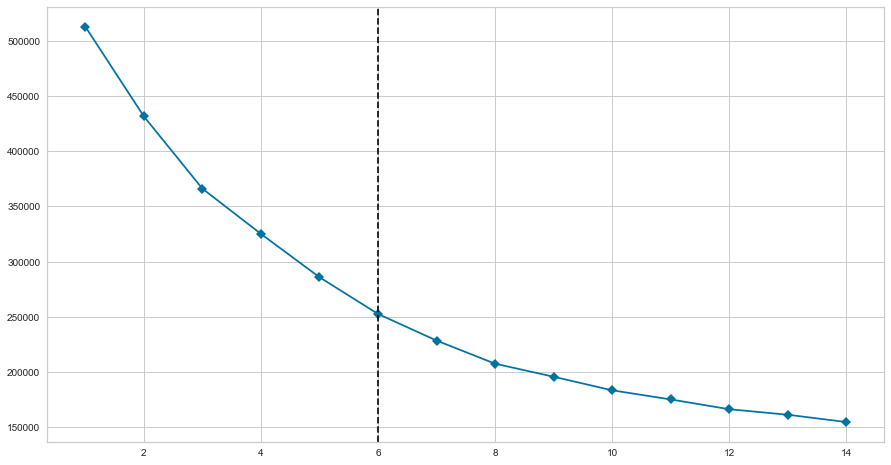

In [30]:
# Use the elbow method to choose the optimal number of clusters 
X = df_scaled[features]
kmeans = KMeans(random_state=1)
kmeans_vis = KElbowVisualizer(kmeans, k=(1,15), metric='distortion', timings=False).fit(X)
print('Optimal number of clusters:', kmeans_vis.elbow_value_)

In [31]:
# Cluster the customers using the optimal number of clusters
df_scaled['CLUSTERS'] = KMeans(n_clusters=kmeans_vis.elbow_value_, random_state=1).fit_predict(X)

# Count the number of customers in each cluster
count_clusters = df_scaled.groupby('CLUSTERS').agg({'CUST_ID': 'nunique'})
customers = df_scaled['CUST_ID'].nunique()
count_clusters['Percent_of_Customers'] = count_clusters['CUST_ID']/customers
count_clusters

,CUST_ID,Percent_of_Customers
CLUSTERS,,
0,749,0.083687
1,1209,0.135084
2,5466,0.610726
3,1465,0.163687
4,23,0.002570
5,38,0.004246


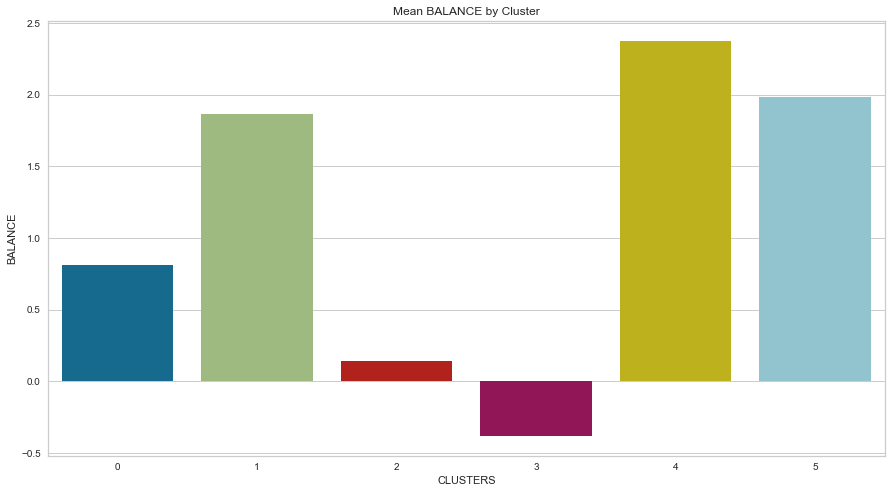

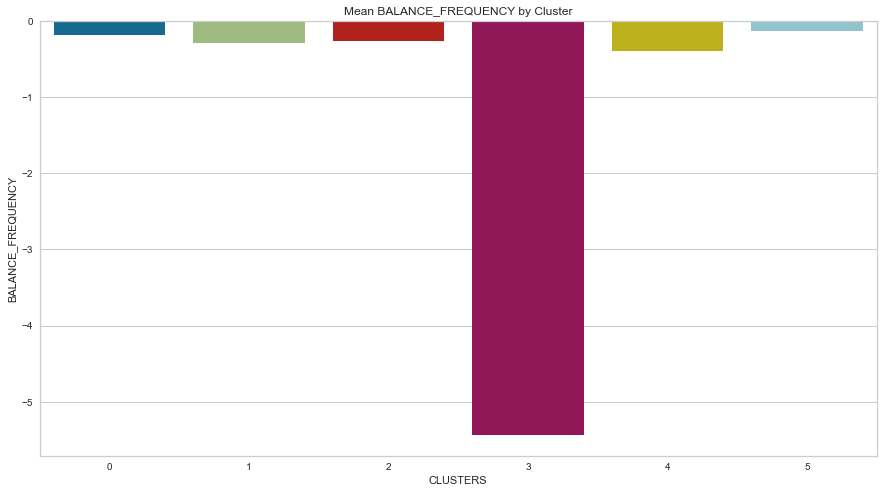

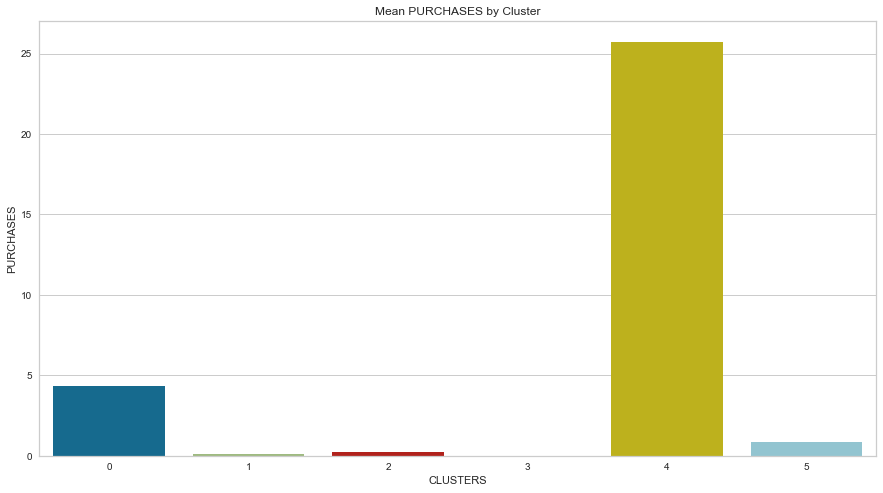

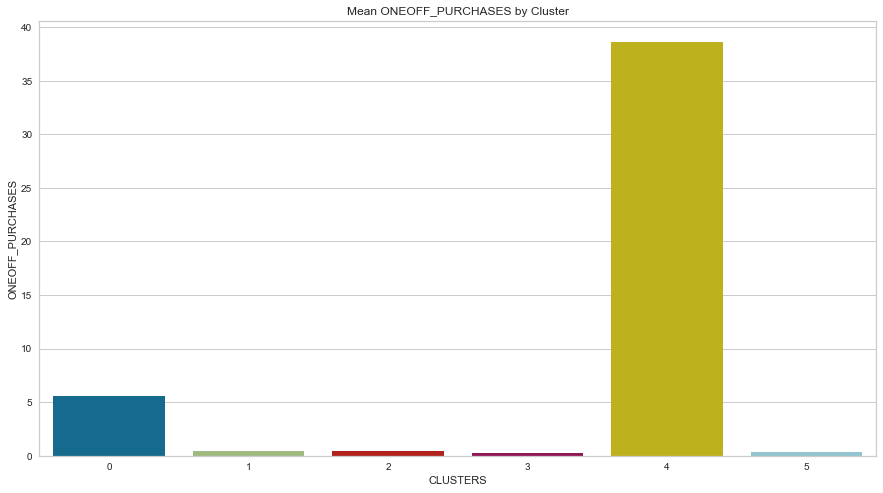

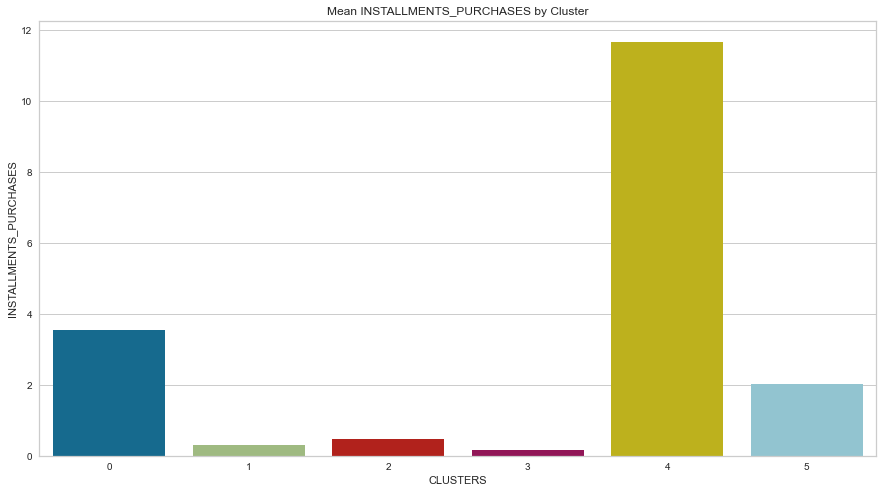

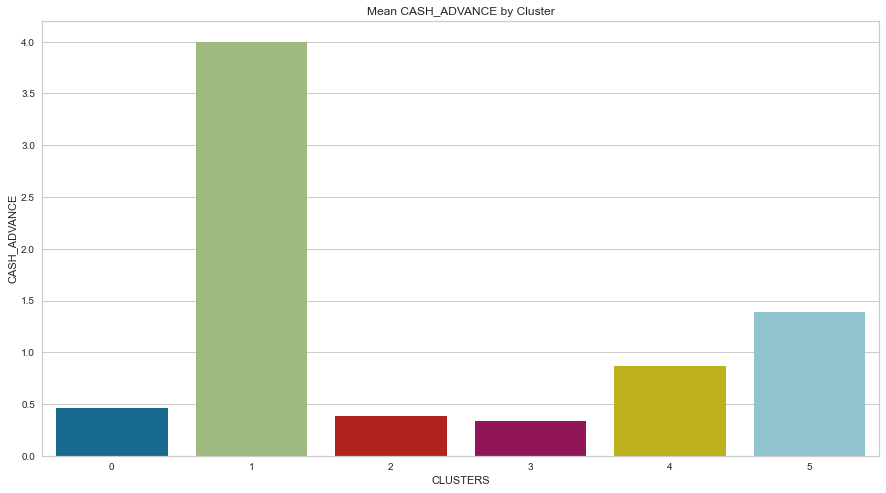

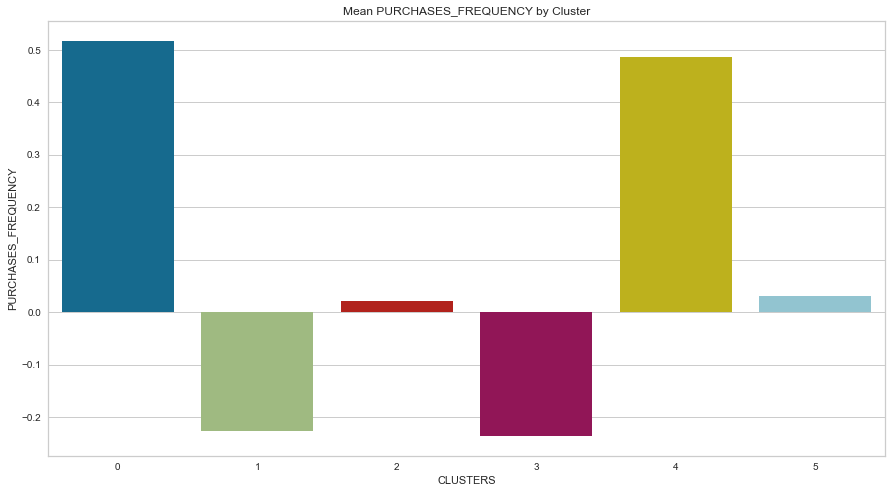

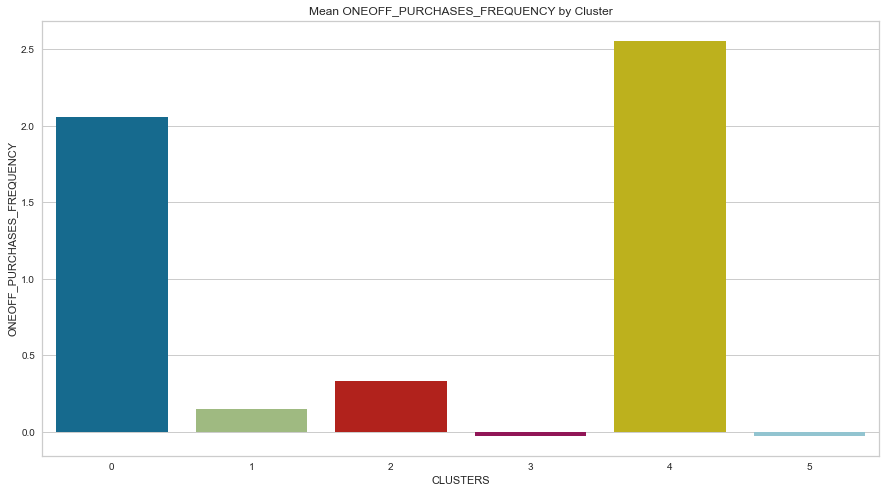

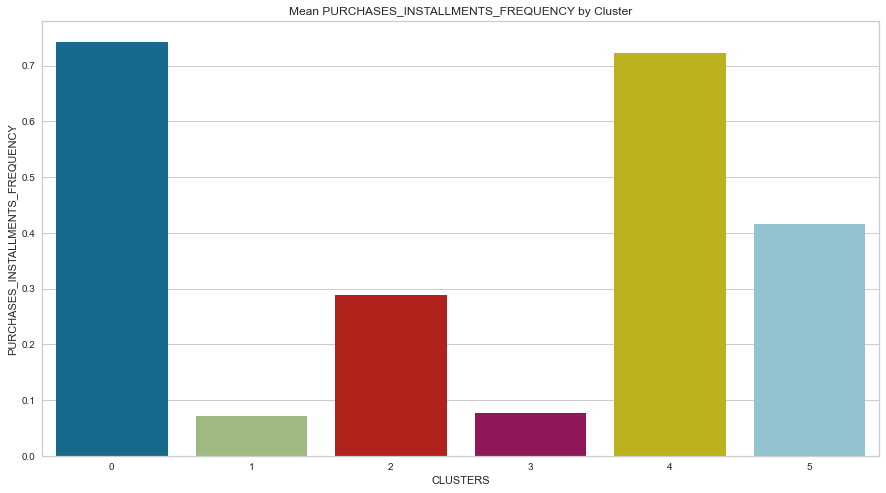

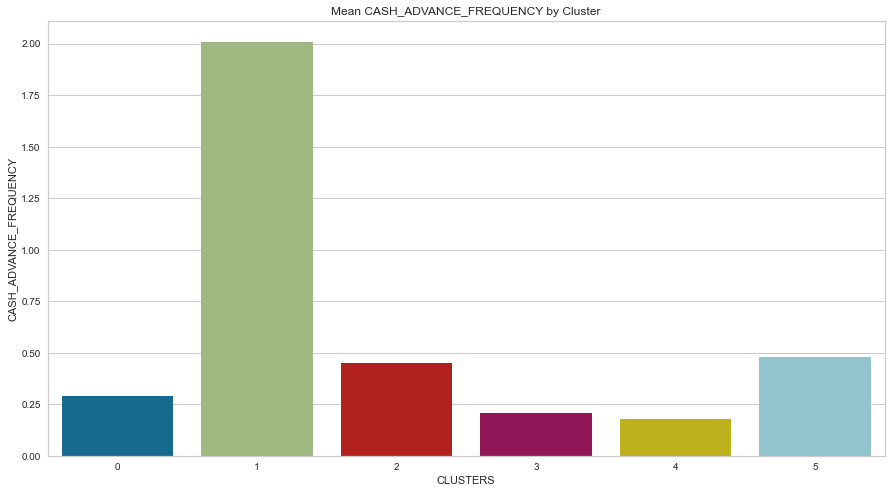

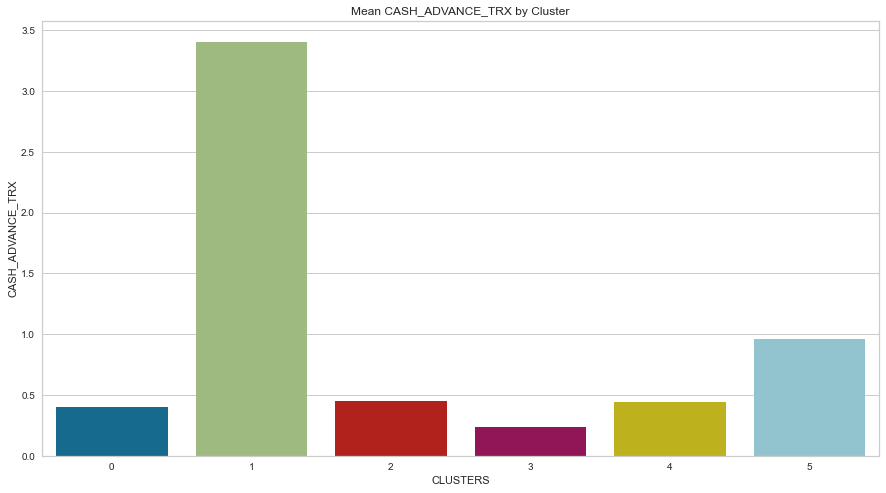

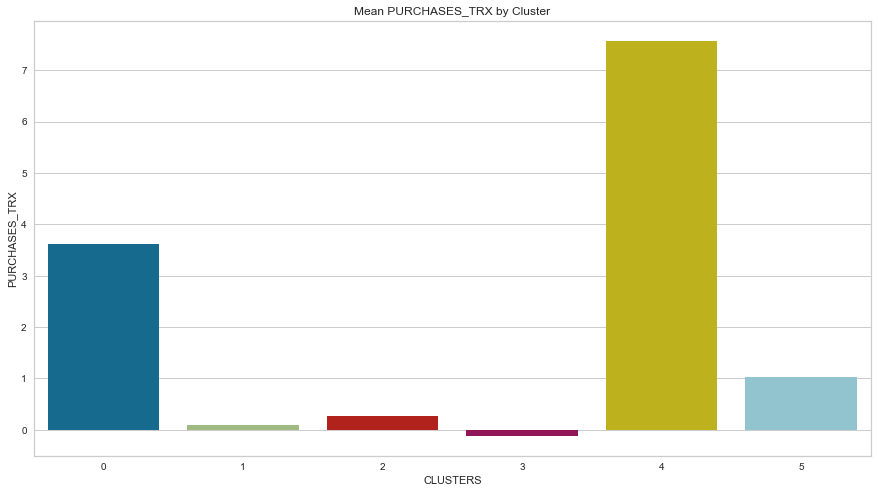

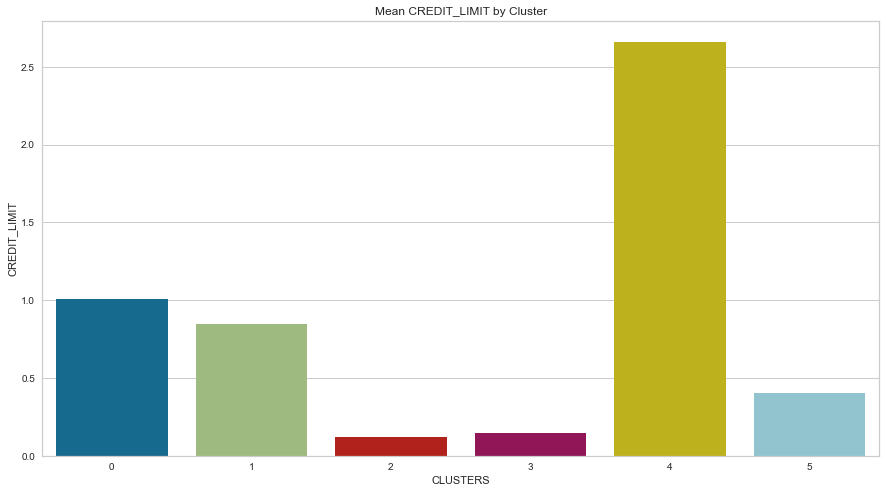

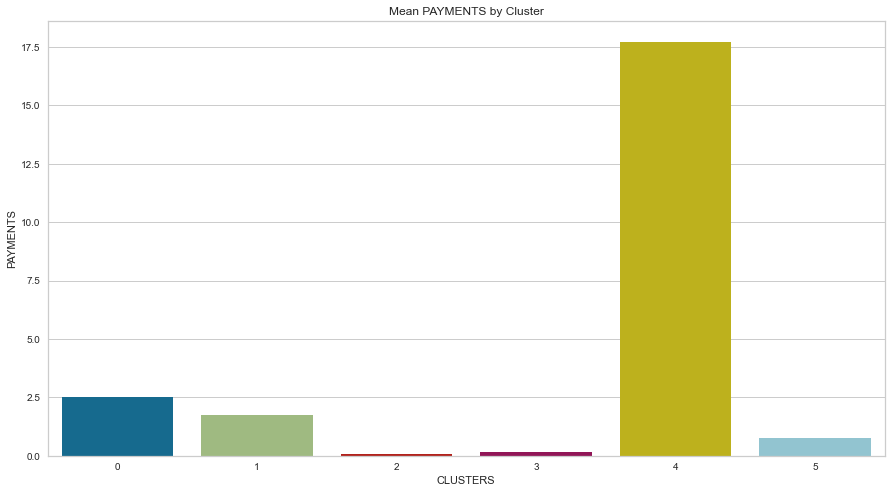

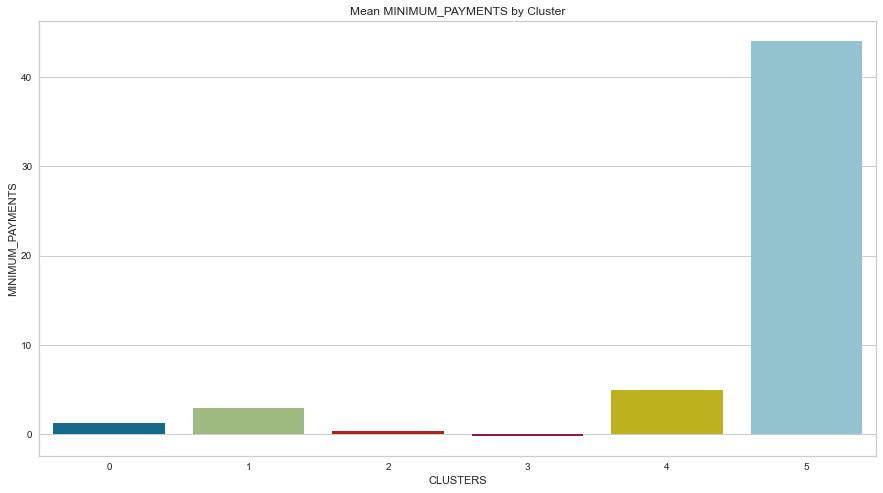

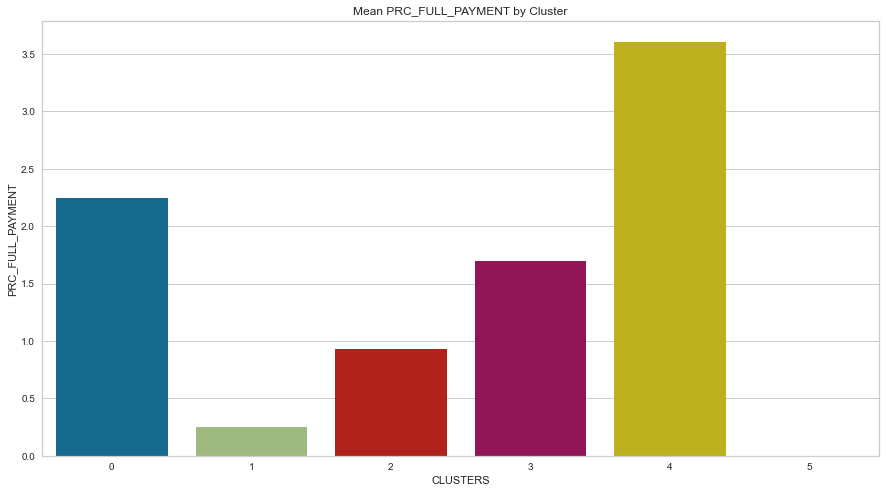

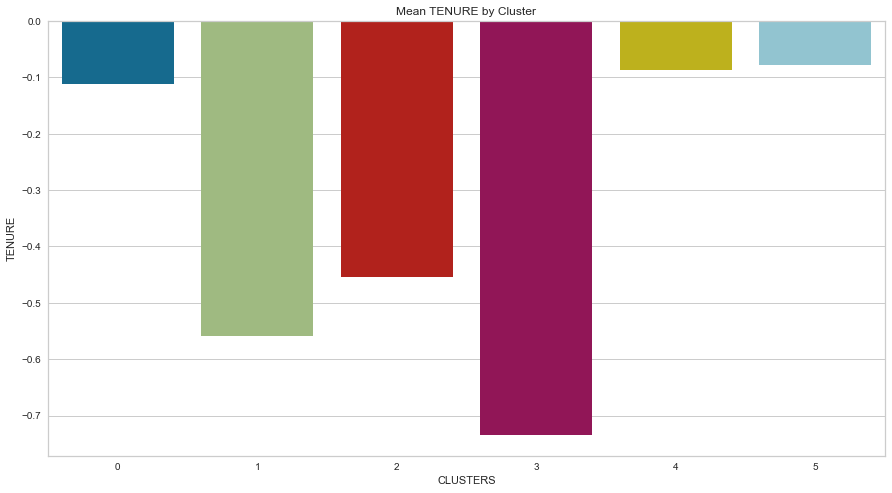

In [32]:
# Plot the average feature value for each cluster
describe_clusters = df_scaled.groupby('CLUSTERS').mean()

for i in features:
    sns.barplot(x = describe_clusters.index
               , y = i
               , data = describe_clusters)
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.show()

In [33]:
# Average feature value for each cluster
describe_clusters.transpose().style.background_gradient(cmap = 'RdYlGn')

CLUSTERS,0,1,2,3,4,5
BALANCE,0.807635,1.866129,0.142755,-0.382031,2.375469,1.983072
BALANCE_FREQUENCY,-0.186646,-0.291563,-0.258842,-5.436679,-0.394862,-0.129187
PURCHASES,4.337847,0.127790,0.244745,0.000270,25.740686,0.872005
ONEOFF_PURCHASES,5.571785,0.405386,0.481689,0.269139,38.649326,0.380966
INSTALLMENTS_PURCHASES,3.545487,0.292529,0.465997,0.169949,11.679051,2.022427
CASH_ADVANCE,0.457702,4.000455,0.388182,0.335697,0.870975,1.384748
PURCHASES_FREQUENCY,0.517180,-0.226416,0.021319,-0.236278,0.486087,0.030861
ONEOFF_PURCHASES_FREQUENCY,2.059739,0.149906,0.331815,-0.028370,2.555557,-0.026581
PURCHASES_INSTALLMENTS_FREQUENCY,0.742816,0.070592,0.287937,0.076471,0.722705,0.416533
CASH_ADVANCE_FREQUENCY,0.289947,2.009885,0.452029,0.206621,0.179348,0.479067


##### Smote
Ketidakseimbangan dapat membuat masalah untuk model klasifikasi, Karena cluster tidak berukuran sama, kita akan menggunakan teknik Smote untuk mengambil sampel lebih banyak dari cluster yang lebih kecil.

In [34]:
X = df_scaled[features]
y = df_scaled['CLUSTERS']

counter = Counter(y)
print('Before SMOTE:')
print(dict(sorted(counter.items())))
print('='*50)

oversample = SMOTE(random_state = 1)
X_SMOTE, y_SMOTE = oversample.fit_resample(X, y)

counter = Counter(y_SMOTE)
print('After SMOTE:')
print(dict(sorted(counter.items())))

df_scaled_SMOTE = pd.concat([y_SMOTE, X_SMOTE], axis=1)

Before SMOTE:
{0: 749, 1: 1209, 2: 5466, 3: 1465, 4: 23, 5: 38}
After SMOTE:
{0: 5466, 1: 5466, 2: 5466, 3: 5466, 4: 5466, 5: 5466}


#### Decision Tree Classifier

In [35]:
# Separate the feature and target variables
X = df_scaled_SMOTE[features]
y = df_scaled_SMOTE['CLUSTERS']

# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=1)

# Fit the decision tree with the training data
tree_model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

# Predict test values
y_pred = tree_model.predict(X_test)

# Evaluate the model with accuracy on the test dataset
tree_accuracy = accuracy_score(y_test, y_pred)

# Classification report
print('Accuracy:', tree_accuracy)
print('Decision Tree Classifier')
print(classification_report(y_test, y_pred))

Accuracy: 0.9863254180911023
Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1804
           1       0.97      0.97      0.97      1804
           2       0.97      0.96      0.97      1803
           3       1.00      0.99      1.00      1804
           4       1.00      1.00      1.00      1804
           5       1.00      1.00      1.00      1804

    accuracy                           0.99     10823
   macro avg       0.99      0.99      0.99     10823
weighted avg       0.99      0.99      0.99     10823



#### Logistic Regression

In [36]:
# Separate the feature and target variables
X = df_scaled_SMOTE[features]
y = df_scaled_SMOTE['CLUSTERS']

# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=1)

# Fit the Logistic Regression with the training data
logit_model = LogisticRegression(random_state=1, solver='liblinear').fit(X_train, y_train)

# Predict test values
y_pred = logit_model.predict(X_test)

# Evaluate the model with accuracy on the test dataset
lr_accuracy = accuracy_score(y_test, y_pred)

# Classification report
print('Accuracy:', lr_accuracy)
print('Linear Regression')
print(classification_report(y_test, y_pred))

Accuracy: 0.9579599002125104
Linear Regression
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1804
           1       0.93      0.91      0.92      1804
           2       0.97      0.89      0.93      1803
           3       0.97      1.00      0.98      1804
           4       0.99      1.00      0.99      1804
           5       0.97      1.00      0.98      1804

    accuracy                           0.96     10823
   macro avg       0.96      0.96      0.96     10823
weighted avg       0.96      0.96      0.96     10823



#### Kesimpulan

Decision Tree lebih akurat daripada logistic Regression

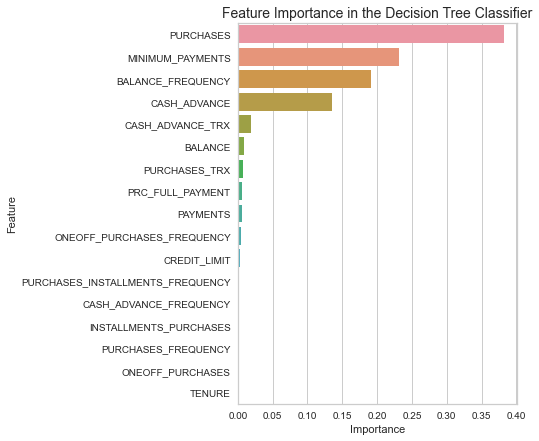

In [37]:
tree_importance = pd.DataFrame({'Feature': features
                               , 'Importance': tree_model.feature_importances_})

tree_importance.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(5, 7))
sns.barplot(y = 'Feature',
            x = 'Importance',
            orient = 'h',
            data=tree_importance)
plt.title('Feature Importance in the Decision Tree Classifier', fontsize=14)
plt.show()


Text(0.5, 1.0, 'Distribution of PURCHASES by CLUSTER')

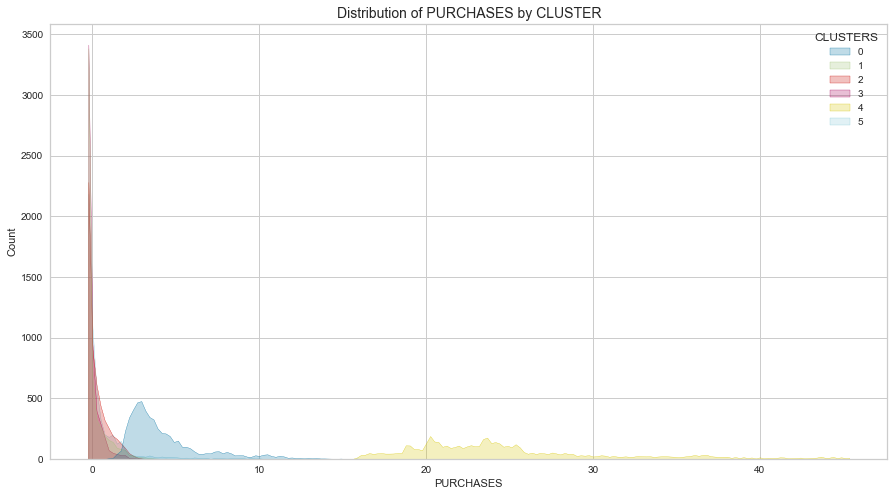

In [38]:
# PURCHASES is the most important feature, plot its distribution for each cluster
unique = sorted(df_scaled_SMOTE.CLUSTERS.unique())
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(x = 'PURCHASES'
            , hue = 'CLUSTERS'
             , element = 'poly'
             , palette = palette
            , data = df_scaled_SMOTE)
plt.title('Distribution of PURCHASES by CLUSTER', fontsize=14)

In [39]:
def summarize_clusters(cluster):
    """Returns description of cluster"""
    counter = Counter(cluster)
    counter = dict(sorted(counter.items()))
    summary = dict()
    for i in counter.keys():
        if counter[i] >= 5400:
            summary[i] = ['Average credit card customer (each of their features are within one standard deviation from the mean)', 'Not the highest or lowest for any feature']
        elif counter[i] >= 1400:
             summary[i] = ['Lowest number of transactions made with cash in advanced'
                                , 'Lowest amount of cash in advance transactions'
                                , 'Lowest number of purchases'
                                , 'Lowest amount of purchases'
                                , 'Lowest amount purchases done in installment'
                                , 'Lowest balance frequency'
                                , 'Lowest balance amount left in their account to make purchases'
                                , 'Lowest tenure'
                                , 'Lowest credit card limit'
                                , 'Lowest amount of minimum payments']
        elif counter[i] >= 1190:
            summary[i] = ['Highest number of transactions made with cash in advanced'
                                , 'Highest amount of cash in advance transactions'
                                , 'Highest frequency of cash in advance transactions'
                                , 'High amount of minimum payments'
                                , 'Low tenure'
                                , 'Low balance frequency'
                                , 'Low purchase freqency']
        elif counter[i] >= 700:
            summary[i] = ['High number of purchases'
                                , 'High amount of purchases'
                                , 'High amount of purchases done in installment'
                                , 'High amount of one-off purchases'
                                , 'High frequency of one-off purchases'
                                , 'High amount of payments'
                                , 'High amount of full payments']
        elif counter[i] >= 30:
            summary[i] = ['Highest balance frequency'
                                , 'Highest tenure'
                                , 'Highest amount of minimum payments'
                                , 'Lowest amount of full payments'
                                , 'Lowest amount of one-off purchases'
                                , 'Lowest frequency of one-off purchases']
        else:
            summary[i] = ['Highest number of purchases'
                                , 'Highest amount of purchases'
                                , 'Highest frequency of purchases'
                                , 'Highest amount of one-off purchases'
                                , 'Highest frequency of one-off purchases'
                                , 'Highest amount of purchases done in installment'
                                , 'Highest amount of payments'
                                , 'Highest amount of full payments'
                                , 'Highest credit limit'
                                , 'Highest balance amount left in their account to make purchases'
                                , 'Lowest frequency of cash in advance transactions']
    for i in summary.keys():
        print('Cluster:', i)
        print(summary[i])
        print('-'*100)


clusters = df_scaled['CLUSTERS']
summarize_clusters(clusters)

Cluster: 0
['High number of purchases', 'High amount of purchases', 'High amount of purchases done in installment', 'High amount of one-off purchases', 'High frequency of one-off purchases', 'High amount of payments', 'High amount of full payments']
----------------------------------------------------------------------------------------------------
Cluster: 1
['Highest number of transactions made with cash in advanced', 'Highest amount of cash in advance transactions', 'Highest frequency of cash in advance transactions', 'High amount of minimum payments', 'Low tenure', 'Low balance frequency', 'Low purchase freqency']
----------------------------------------------------------------------------------------------------
Cluster: 2
['Average credit card customer (each of their features are within one standard deviation from the mean)', 'Not the highest or lowest for any feature']
----------------------------------------------------------------------------------------------------
Cluster: 3

#### Model Deployment

In [42]:
with open('model.pkl', 'wb') as file:
    pickle.dump(tree_model, file)